In [2]:
import PIL
import boto3
from PIL import Image
from io import BytesIO
import numpy as np
s3_client = boto3.client('s3')
paginator = s3_client.get_paginator('list_objects_v2')
bucket = 'verafin-mitacs-yifu-chen'
keys =['logos/logos/A/', 'logos/logos/B/', 'logos/logos/C/', 'logos/logos/D/', 'logos/logos/E/', 'logos/logos/J/', 'logos/logos/K/', 'logos/logos/L/', 'logos/logos/M/', 'logos/logos/P/'
      ,'logos/logos/Q/','logos/logos/V/', 'logos/logos/W/', 'logos/logos/X/','logos/logos/Y/','logos/logos/Z/', 
       'logos/logos/H/', 'logos/logos/bank/', 'logos/logos/I/','logos/logos/F/']

In [3]:
images=[]
variant=[]

In [4]:
for key in keys:
    pages = paginator.paginate(Bucket=bucket, Prefix=key)
    for page in pages:
        for obj in page['Contents']:
            img_key=obj['Key']
            file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
            im = Image.open(BytesIO(file_byte_string))
            im = im.resize((128,128))
            im = np.array(im)
            if im.shape == (128,128,3):
                images.append(im)
            else:
                variant.append(im)

In [5]:
x = np.array(images)

In [6]:
x.shape

(6239, 128, 128, 3)

In [7]:
from io import BytesIO
import numpy as np
from urllib.parse import urlparse
import boto3
client = boto3.client("s3")

def to_s3_npy(data: np.array, s3_uri: str):
    # s3_uri looks like f"s3://{BUCKET_NAME}/{KEY}"
    bytes_ = BytesIO()
    np.save(bytes_, data, allow_pickle=True)
    bytes_.seek(0)
    parsed_s3 = urlparse(s3_uri)
    client.upload_fileobj(
        Fileobj=bytes_, Bucket=parsed_s3.netloc, Key=parsed_s3.path[1:]
    )
    return True

In [8]:
to_s3_npy(x, 's3://verafin-mitacs-yifu-chen/128_checks/')

True

In [5]:
def from_s3_npy(s3_uri: str):
    bytes_ = BytesIO()
    parsed_s3 = urlparse(s3_uri)
    client.download_fileobj(
        Fileobj=bytes_, Bucket=parsed_s3.netloc, Key=parsed_s3.path[1:]
    )
    bytes_.seek(0)
    return np.load(bytes_, allow_pickle=True)

In [6]:
c = from_s3_npy('s3://verafin-mitacs-yifu-chen/64/')

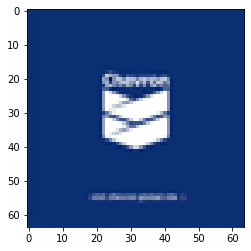

In [7]:
import matplotlib.pyplot as plt
plt.imshow(c[1278])

In [8]:
c.shape

(6239, 64, 64, 3)

In [9]:
c1 = c[0:500]

In [10]:
c1.shape

(500, 64, 64, 3)

In [11]:
import tensorflow as tf
X1 = tf.data.Dataset.from_tensor_slices(c1)
buffer_size = 22122
batch_size = 32
X1 = X1.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
X1

<BatchDataset shapes: (32, 64, 64, 3), types: tf.uint8>

# check

In [11]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        print(filename)
        img = cv2.imread(os.path.join(folder,filename))
        resized_image = cv2.resize(img, (img.shape[0]*int(0.2), img.shape[1]*int(0.2)))
        resized_image.shape
        images.append(img)
    
    return images

In [9]:
path = 's3://verafin-mitacs-yifu-chen/check-images/another_one/'

In [10]:
import cv2

In [11]:
images=[]
for filename in check_img:
    img = cv2.imread(filename)
    resized_img = cv2.resize(img, (224,224))
    images.append(resized_img)

In [12]:
len(images)

160

In [13]:
import numpy as np
img = np.expand_dims(images[0], axis=0)

In [64]:
#from keras.preprocessing.image import ImageDataGenerator 

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.1,
                             width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             fill_mode = 'nearest',
                             horizontal_flip= True
                            )

In [ ]:
for img in images:
    img_array = np.expand_dims(img, axis=0)
    count = 0
    for batch in datagen.flow(img_array, batch_size=32, save_to_dir='./localdir/traditional_gen_images', save_prefix= 'gen_'):
        count += 1
        if count > 10:
            break
    

In [14]:
import numpy as np
X = np.array(images)
X = (X.astype(np.float32) - 127.5) / 127.5
import tensorflow as tf
X1 = tf.data.Dataset.from_tensor_slices(X)
buffer_size = 2212
batch_size = 32
X1 = X1.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
X1

<BatchDataset shapes: (32, 224, 224, 3), types: tf.float32>

(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)
(32, 224, 224, 3)


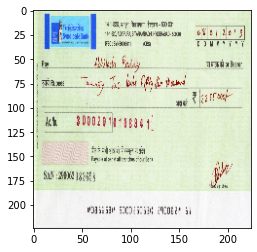

In [15]:
import matplotlib.pyplot as plt
train_data1 = (iter(X1))
for img in train_data1:
    plt.imshow(img[0]*0.5 +0.5)
    print(img.shape)

# Boto3 dataset loading

In [39]:
import PIL
import boto3
from PIL import Image
from io import BytesIO
import numpy as np
s3_client = boto3.client('s3')
paginator = s3_client.get_paginator('list_objects_v2')
bucket = 'verafin-mitacs-yifu-chen'
key='check-images/another_one/'
pages = paginator.paginate(Bucket=bucket, Prefix=key) 

In [40]:
paginator.paginate(Bucket=bucket, Prefix=key)

images=[]
variant=[]
for page in pages:
    for obj in page['Contents']:
        img_key=obj['Key']
        file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
        im = Image.open(BytesIO(file_byte_string))
        im = im.resize((224,224))
        im = np.array(im)
        if im.shape == (224,224,3):
            images.append(im)
        else:
            variant.append(im)

In [41]:
bucket = 'verafin-mitacs-yifu-chen'
key='geo_check/'
pages = paginator.paginate(Bucket=bucket, Prefix=key)

images=[]
variant=[]
for page in pages:
    for obj in page['Contents']:
        img_key=obj['Key']
        file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
        im = Image.open(BytesIO(file_byte_string))
        im = im.resize((224,224))
        im = np.array(im)
        if im.shape == (224,224,3):
            images.append(im)
        else:
            variant.append(im)

In [42]:
len(images)

1595

In [43]:
images0 = np.array(images[1030]) 

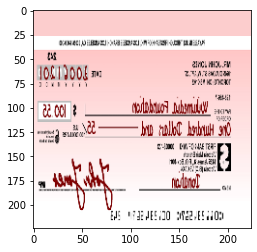

In [44]:
import matplotlib.pyplot as plt
plt.imshow(images0, interpolation='nearest')

In [45]:
X = np.array(images)

In [46]:
X = (X.astype(np.float32) - 127.5) / 127.5

In [47]:
X.shape

(1595, 224, 224, 3)

In [48]:
import tensorflow as tf
X1 = tf.data.Dataset.from_tensor_slices(X)

In [49]:
buffer_size = 2212
batch_size = 32
X1 = X1.shuffle(buffer_size).batch(batch_size, drop_remainder=True)
X1

<BatchDataset shapes: (32, 224, 224, 3), types: tf.float32>

import tensorflow as tf
X=tf.keras.preprocessing.image_dataset_from_directory(
    './localdir',
    labels="inferred",
    
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(896, 896),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

In [50]:
from tensorflow.python.client import device_lib

In [51]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [28]:
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 16941049282927367311,
 name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11707338022782489178
 physical_device_desc: "device: XLA_CPU device",
 name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14280091702546461561
 physical_device_desc: "device: XLA_GPU device",
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10871291264
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 2156972644674578217
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:1e.0, compute capability: 3.7"]

# DCGANs 

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import pathlib

from keras.layers import Input, Dense, Reshape, Flatten
from keras.layers import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model

from tensorflow.keras.models import Sequential
import keras.backend as K
from keras.layers import Conv2D, Conv2DTranspose, Reshape, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm, tqdm_notebook
import math
import random
import time
import datetime
import shutil
import imageio

In [13]:
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU, Reshape,\
Conv2DTranspose, Conv2D, Flatten, Dropout, Embedding, ReLU, InputSpec
from tensorflow.keras.optimizers import Adam

#from IPython import display

# libraries for SpectralNorm
from tensorflow.keras import backend as K
from keras.engine import *
from tensorflow.keras import activations
from tensorflow.keras import initializers
from tensorflow.keras import regularizers
from tensorflow.keras import constraints

In [14]:
buffer_size = 2212
batch_size = 16
weight_init_std = 0.02
weight_init_mean = 0.0
leaky_relu_slope = 0.2
downsize_factor = 2
dropout_rate = 0.5
scale_factor = 4 ** downsize_factor
lr_decay_steps = 1000
noise_dim = 128

In [15]:
image_width = 64
image_height = 64
image_channels = 3
image_sample_size = 100

In [16]:
weight_initializer = tf.keras.initializers.TruncatedNormal(stddev=weight_init_std, mean=weight_init_mean,
                                                          seed=42)

In [17]:
def transposed_conv(model, out_channels, ksize, stride_size, ptype='same'):
    model.add(Conv2DTranspose(out_channels, (ksize, ksize),
                              strides=(stride_size, stride_size), padding=ptype, 
                              kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=0.2))
    return model

In [18]:
def Generator():
    model = Sequential()
    model.add(Dense(image_width // scale_factor * image_height // scale_factor * 128,
                    input_shape=(noise_dim,), kernel_initializer=weight_initializer))
    #model.add(BatchNormalization(epsilon=BN_EPSILON, momentum=BN_MOMENTUM))
    model.add(LeakyReLU(alpha=leaky_relu_slope))
    model.add(Reshape((image_height // scale_factor, image_width // scale_factor, 128)))
    
    model = transposed_conv(model, 512, ksize=5, stride_size=1)
    model.add(Dropout(dropout_rate))
    model = transposed_conv(model, 256, ksize=5, stride_size=2)
    model.add(Dropout(dropout_rate))
    model = transposed_conv(model, 128, ksize=5, stride_size=2)
    model = transposed_conv(model, 64, ksize=5, stride_size=2)
    model = transposed_conv(model, 32, ksize=5, stride_size=2)
    
    model.add(Dense(3, activation='tanh', kernel_initializer=weight_initializer))

    return model

In [19]:
generator = Generator()
print(generator.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              264192    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 4, 4, 512)         1638400   
_________________________________________________________________
batch_normalization (BatchNo (None, 4, 4, 512)         2048      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 4, 4, 512)         0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 512)         0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(1, 64, 64, 3)
(1, 128) -0.015458129 0.9763265


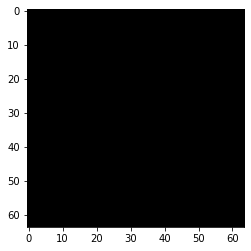

In [20]:
import matplotlib.pyplot as plt
# random noise vector
noise = tf.random.normal([1,noise_dim])
#sample = generate_latent_points(100, 50)
# run the generator model with the noise vector as input
generated_image = generator(noise, training=False)
# display output
plt.imshow(generated_image[0, :, :, :])
print(generated_image.shape)

print(noise.shape, tf.math.reduce_mean(noise).numpy(), tf.math.reduce_std(noise).numpy())

In [21]:
class DenseSN(Dense):
    def build(self, input_shape):
        assert len(input_shape) >= 2
        input_dim = input_shape[-1]
        self.kernel = self.add_weight(shape=(input_dim, self.units),
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)
        if self.use_bias:
            self.bias = self.add_weight(shape=(self.units,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                                 initializer=initializers.RandomNormal(0, 1),
                                 name='sn',
                                 trainable=False)
        self.input_spec = InputSpec(min_ndim=2, axes={-1: input_dim})
        self.built = True
        
    def call(self, inputs, training=None):
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                 W_bar = K.reshape(W_bar, W_shape)  
        output = K.dot(inputs, W_bar)
        if self.use_bias:
            output = K.bias_add(output, self.bias, data_format='channels_last')
        if self.activation is not None:
            output = self.activation(output)
        return output 
class ConvSN2D(Conv2D):

    def build(self, input_shape):
        if self.data_format == 'channels_first':
            channel_axis = 1
        else:
            channel_axis = -1
        if input_shape[channel_axis] is None:
            raise ValueError('The channel dimension of the inputs '
                             'should be defined. Found `None`.')
        input_dim = input_shape[channel_axis]
        kernel_shape = self.kernel_size + (input_dim, self.filters)

        self.kernel = self.add_weight(shape=kernel_shape,
                                      initializer=self.kernel_initializer,
                                      name='kernel',
                                      regularizer=self.kernel_regularizer,
                                      constraint=self.kernel_constraint)

        if self.use_bias:
            self.bias = self.add_weight(shape=(self.filters,),
                                        initializer=self.bias_initializer,
                                        name='bias',
                                        regularizer=self.bias_regularizer,
                                        constraint=self.bias_constraint)
        else:
            self.bias = None
            
        self.u = self.add_weight(shape=tuple([1, self.kernel.shape.as_list()[-1]]),
                         initializer=initializers.RandomNormal(0, 1),
                         name='sn',
                         trainable=False)
        
        # Set input spec.
        self.input_spec = InputSpec(ndim=self.rank + 2,
                                    axes={channel_axis: input_dim})
        self.built = True
    def call(self, inputs, training=None):
        def _l2normalize(v, eps=1e-12):
            return v / (K.sum(v ** 2) ** 0.5 + eps)
        def power_iteration(W, u):
            #Accroding the paper, we only need to do power iteration one time.
            _u = u
            _v = _l2normalize(K.dot(_u, K.transpose(W)))
            _u = _l2normalize(K.dot(_v, W))
            return _u, _v
        #Spectral Normalization
        W_shape = self.kernel.shape.as_list()
        #Flatten the Tensor
        W_reshaped = K.reshape(self.kernel, [-1, W_shape[-1]])
        _u, _v = power_iteration(W_reshaped, self.u)
        #Calculate Sigma
        sigma=K.dot(_v, W_reshaped)
        sigma=K.dot(sigma, K.transpose(_u))
        #normalize it
        W_bar = W_reshaped / sigma
        #reshape weight tensor
        if training in {0, False}:
            W_bar = K.reshape(W_bar, W_shape)
        else:
            with tf.control_dependencies([self.u.assign(_u)]):
                W_bar = K.reshape(W_bar, W_shape)
                
        outputs = K.conv2d(
                inputs,
                W_bar,
                strides=self.strides,
                padding=self.padding,
                data_format=self.data_format,
                dilation_rate=self.dilation_rate)
        if self.use_bias:
            outputs = K.bias_add(
                outputs,
                self.bias,
                data_format=self.data_format)
        if self.activation is not None:
            return self.activation(outputs)
        return outputs

In [22]:
def convSN(model, out_channels, ksize, stride_size):
    model.add(ConvSN2D(out_channels, (ksize, ksize), strides=(stride_size, stride_size), padding='same',
                     kernel_initializer=weight_initializer, use_bias=False))
    model.add(BatchNormalization())
    model.add(LeakyReLU(alpha=leaky_relu_slope))
    #model.add(Dropout(dropout_rate))
    return model

In [23]:
def Discriminator(spectral_normalization=True):
    model = Sequential()
    if spectral_normalization:
        model.add(ConvSN2D(128, (5, 5), strides=(1,1), padding='same', use_bias=False,
                         input_shape=[image_height, image_width, image_channels], 
                         kernel_initializer=weight_initializer)) # 64
        
        model.add(LeakyReLU(alpha=leaky_relu_slope))
        #model.add(Dropout(dropout_rate))
        
        #model = convSN(model, 32, ksize=5, stride_size=2)
        
        model = convSN(model, 64, ksize=5, stride_size=2)
        #model = convSN(model, 128, ksize=3, stride_size=1)
        model = convSN(model, 128, ksize=5, stride_size=2)
        #model = convSN(model, 256, ksize=3, stride_size=1)
        model = convSN(model, 256, ksize=5, stride_size=2)
        #model = convSN(model, 512, ksize=3, stride_size=1)
        #model.add(Dropout(dropout_rate))
        model = convSN(model, 512, ksize=5, stride_size=2)

        model.add(Flatten())
        model.add(DenseSN(1, activation='sigmoid'))
    else:
        model.add(Conv2D(64, (4, 4), strides=(2,2), padding='same', use_bias=False,
                         input_shape=[image_height, image_width, image_channels], 
                         kernel_initializer=weight_initializer))
        #model.add(BatchNormalization(epsilon=BN_EPSILON, momentum=BN_MOMENTUM))
        model.add(LeakyReLU(alpha=leaky_relu_slope))
        #model.add(Dropout(dropout_rate))

        model = conv(model, 64, ksize=4, stride_size=2)
        #model = convSN(model, 128, ksize=3, stride_size=1)
        model = conv(model, 128, ksize=4, stride_size=2)
        #model = convSN(model, 256, ksize=3, stride_size=1)
        model = conv(model, 256, ksize=4, stride_size=2)
        #model = convSN(model, 512, ksize=3, stride_size=1)

        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
    return model

In [24]:
discriminator = Discriminator(spectral_normalization=True)
print(discriminator.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_s_n2d (ConvSN2D)        (None, 64, 64, 128)       9728      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 64, 64, 128)       0         
_________________________________________________________________
conv_s_n2d_1 (ConvSN2D)      (None, 32, 32, 64)        204864    
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv_s_n2d_2 (ConvSN2D)      (None, 16, 16, 128)       204928    
_________________________________________________________________
batch_normalization_6 (Batch (None, 16, 16, 128)      

In [25]:
decision = discriminator(generated_image)
print(decision)

tf.Tensor([[0.5000019]], shape=(1, 1), dtype=float32)


In [26]:
def smooth_positive_labels(y):
    return y - 0.3 + (np.random.random(y.shape) * 0.5)

def smooth_negative_labels(y):
    return y + np.random.random(y.shape) * 0.3

In [27]:
# randomly flip some labels
def noisy_labels(y, p_flip):
    # determine the number of labels to flip
    n_select = int(p_flip * int(y.shape[0]))
    # choose labels to flip
    flip_ix = np.random.choice([i for i in range(int(y.shape[0]))], size=n_select)
    
    op_list = []
    # invert the labels in place
    #y_np[flip_ix] = 1 - y_np[flip_ix]
    for i in range(int(y.shape[0])):
        if i in flip_ix:
            op_list.append(tf.subtract(1, y[i]))
        else:
            op_list.append(y[i])
    
    outputs = tf.stack(op_list)
    return outputs

In [28]:
generator_optimizer = tf.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_optimizer = tf.optimizers.Adam(learning_rate=0.0002, beta_1=0.5) 

# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [29]:
def discriminator_loss(real_output, fake_output, loss_func, apply_label_smoothing=True, label_noise=True):
    if label_noise and apply_label_smoothing:
        real_output_noise = noisy_labels(tf.ones_like(real_output), 0.05)
        fake_output_noise = noisy_labels(tf.zeros_like(fake_output), 0.05)
        real_output_smooth = smooth_positive_labels(real_output)
        fake_output_smooth = smooth_negative_labels(fake_output)
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_smooth), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_smooth), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output_smooth - tf.reduce_mean(fake_output_smooth) - tf.ones_like(real_output_smooth)))
        + tf.reduce_mean(tf.square(fake_output_smooth - tf.reduce_mean(real_output_smooth) + tf.ones_like(fake_output_smooth)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_smooth)
                avg_real_logit = tf.reduce_mean(real_output_smooth)
                D_r_tilde = tf.nn.sigmoid(real_output_smooth - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_smooth - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output_smooth) - (real_output_smooth - tf.reduce_mean(fake_output_smooth))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_smooth) + (fake_output_smooth - tf.reduce_mean(real_output_smooth))))
        total_loss = real_loss + fake_loss
        return total_loss
    elif label_noise and not apply_label_smoothing:
        real_output_noise = noisy_labels(tf.ones_like(real_output), 0.05)
        fake_output_noise = noisy_labels(tf.zeros_like(fake_output), 0.05)
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_noise), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_noise), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output_noise - tf.reduce_mean(fake_output_noise) - tf.ones_like(real_output_noise)))
        + tf.reduce_mean(tf.square(fake_output_noise - tf.reduce_mean(real_output_noise) + tf.ones_like(fake_output_noise)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_noise)
                avg_real_logit = tf.reduce_mean(real_output_noise)
                D_r_tilde = tf.nn.sigmoid(real_output_noise - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_noise - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output_noise) - (real_output_noise - tf.reduce_mean(fake_output_noise))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_noise) + (fake_output_noise - tf.reduce_mean(real_output_noise))))
        total_loss = real_loss + fake_loss
        return total_loss
    elif apply_label_smoothing and not label_noise:
        real_output_smooth = smooth_positive_labels(tf.ones_like(real_output))
        fake_output_smooth = smooth_negative_labels(tf.zeros_like(fake_output))
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output_smooth), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output_smooth), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output_smooth - tf.reduce_mean(fake_output_smooth) - tf.ones_like(real_output_smooth)))
        + tf.reduce_mean(tf.square(fake_output_smooth - tf.reduce_mean(real_output_smooth) + tf.ones_like(fake_output_smooth)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_smooth)
                avg_real_logit = tf.reduce_mean(real_output_smooth)
                D_r_tilde = tf.nn.sigmoid(real_output_smooth - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_smooth - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output_smooth) - (real_output_smooth - tf.reduce_mean(fake_output_smooth))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_smooth) + (fake_output_smooth - tf.reduce_mean(real_output_smooth))))
        total_loss = real_loss + fake_loss
        return total_loss    
    else:
        if loss_func == 'gan': 
            real_loss = cross_entropy(tf.ones_like(real_output), real_output)
            fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output - tf.reduce_mean(fake_output) - tf.ones_like(real_output)))
        + tf.reduce_mean(tf.square(fake_output - tf.reduce_mean(real_output) + tf.ones_like(fake_output)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output)
                avg_real_logit = tf.reduce_mean(real_output)
                D_r_tilde = tf.nn.sigmoid(real_output - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_r_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_f_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output) - (real_output - tf.reduce_mean(fake_output))))
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output) + (fake_output - tf.reduce_mean(real_output))))
        total_loss = real_loss + fake_loss
        return total_loss

In [30]:
def generator_loss(real_output, fake_output, loss_func, apply_label_smoothing=True):
    if apply_label_smoothing:
        fake_output_smooth = smooth_negative_labels(tf.ones_like(fake_output))
        if loss_func == 'gan':
            return cross_entropy(tf.ones_like(fake_output_smooth), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output - tf.reduce_mean(fake_output_smooth) + tf.ones_like(real_output)))
        + tf.reduce_mean(tf.square(fake_output_smooth - tf.reduce_mean(real_output) - tf.ones_like(fake_output_smooth)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output_smooth)
                avg_real_logit = tf.reduce_mean(real_output)
                D_r_tilde = tf.nn.sigmoid(real_output - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output_smooth - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_f_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_r_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output_smooth) - (fake_output_smooth - tf.reduce_mean(real_output))))
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output) + (real_output - tf.reduce_mean(fake_output_smooth))))
                loss = fake_loss + real_loss
                return loss
    else:           
        if loss_func == 'gan':
            return cross_entropy(tf.ones_like(fake_output), fake_output)
        else:
            if loss_func == 'ralsgan':
                return (tf.reduce_mean(tf.square(real_output - tf.reduce_mean(fake_output) + tf.ones_like(real_output)))
        + tf.reduce_mean(tf.square(fake_output - tf.reduce_mean(real_output) - tf.ones_like(fake_output)))) / 2.
            elif loss_func == 'rasgan':
                avg_fake_logit = tf.reduce_mean(fake_output)
                avg_real_logit = tf.reduce_mean(real_output)
                D_r_tilde = tf.nn.sigmoid(real_output - avg_fake_logit)
                D_f_tilde = tf.nn.sigmoid(fake_output - avg_real_logit)
                total_loss = - tf.reduce_mean(tf.math.log(
                    D_f_tilde + 1e-14)) - tf.reduce_mean(tf.math.log(1 - D_r_tilde + 1e-14))
                return total_loss
            elif loss_func == 'rahinge':
                fake_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(fake_output) - (fake_output - tf.reduce_mean(real_output))))
                real_loss = tf.reduce_mean(tf.nn.relu(tf.ones_like(real_output) + (real_output - tf.reduce_mean(fake_output))))
                loss = fake_loss + real_loss
                return loss 

In [31]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [32]:
EPOCHS = 50
num_examples_to_generate = 16
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [33]:
lr_initial_d = 0.001 #We used the Adam optimizer with tuned hyperparameters. We found the suggested learning rate of 0.001, to be too high, 
#using 0.0002 instead. Additionally, we found leaving the momentum term β1 at the suggested value of 0.9 resulted in training oscillation 
#and instability while reducing it to 0.5 helped stabilize training.
lr_initial_g = 0.001

In [34]:
initial_learning_rate = 0.002
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=100,
    decay_rate=0.96,
    staircase=True)

In [35]:
generator_optimizer = tf.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.5)
discriminator_optimizer = tf.optimizers.Adam(learning_rate=lr_schedule, beta_1=0.5) 

In [36]:
def train_step(images, loss_type='gan'):
    noise = tf.random.normal([batch_size, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)
        
        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)
        
        gen_loss = generator_loss(real_output, fake_output, loss_type, apply_label_smoothing=True)
        disc_loss = discriminator_loss(real_output, fake_output, loss_type, 
                                       apply_label_smoothing=True, label_noise=True)
 
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

In [37]:
X2 = next(iter(X1))

In [38]:
train_step(X2)

(<tf.Tensor: shape=(), dtype=float32, numpy=0.44024608>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1.4878569>)

In [39]:
def plot_losses(G_losses, D_losses, all_gl, all_dl, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH {}".format(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    ymax = plt.ylim()[1]
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(all_gl)),all_gl,label='G')
    plt.plot(np.arange(len(all_dl)),all_dl,label='D')
    plt.legend()
    #plt.ylim((0,np.min([1.1*np.max(all_gl),2*ymax])))
    plt.title('All Time Loss')
    plt.show()

In [40]:
def generate_and_save_images(model, epoch, test_input, rows, cols):
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(20,20))
    for i in range(predictions.shape[0]):
        plt.subplot(rows, cols, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    
    plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
    plt.show()

In [41]:
def generate_test_image(model, noise_dim=noise_dim):
    test_input = tf.random.normal([1, noise_dim])
    # Notice `training` is set to False.
    # This is so all layers run in inference mode (batchnorm).
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(6,6))
    plt.imshow((predictions[0, :, :, :] * 127.5 + 127.5) / 255.)
    plt.axis('off') 
    plt.show()

In [42]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [43]:
from pathlib import Path
OUT_DIR = Path('output_images')
def save_images(directory=OUT_DIR):
    for k in range(image_sample_size):
        generated_image = generator(tf.random.normal([1, noise_dim]), training=False)
        f = str(k)+'.png'
        f = os.path.join(directory, f)
        img = np.array(generated_image)
        img = (img[0, :, :, :] + 1.) / 2.
        #img = np.squeeze(img, axis=2)  # axis=2 is channel dimension 
        img = Image.fromarray((255*img).astype(np.uint8))
        img.save(f,'PNG')
        #if k % 1000==0: print(k)
    print('Saved temporary images for evaluation.')
def zip_images(filename='images.zip'):
    # SAVE TO ZIP FILE NAMED IMAGES.ZIP
    z = zipfile.PyZipFile(filename, mode='w')
    for k in range(image_sample_size):
        generated_image = generator(tf.random.normal([1, noise_dim]), training=False)
        f = str(k)+'.png'
        img = np.array(generated_image)
        img = (img[0, :, :, :] + 1.) / 2.
        img = np.squeeze(img, axis=2)
        img = Image.fromarray((255*img).astype(np.uint8))
        img.save(f,'PNG')
        z.write(f)
        os.remove(f)
        #if k % 1000==0: print(k)
    z.close()
    print('Saved final images for submission.')

In [43]:
display_results = 10
decay_step = 10

def train(dataset, epochs):
    all_gl = np.array([]); all_dl = np.array([])
    
    exp_replay = []
    for epoch in tqdm(range(epochs)):
        
        G_loss = []; D_loss = []
        
        start = time.time()
        
        global_step = 0
        
        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            global_step = global_step + 1
            G_loss.append(g_loss); D_loss.append(d_loss)
            all_gl = np.append(all_gl,np.array([G_loss]))
            all_dl = np.append(all_dl,np.array([D_loss]))

         
        #display.clear_output(wait=True)
        if (epoch + 1) % display_results == 0 or epoch == 0:
            plot_losses(G_loss, D_loss, all_gl, all_dl, epoch + 1)
            generate_and_save_images(generator, epoch + 1, seed, rows=4, cols=4)
        
                
     

        print('Epoch: {} computed for {} sec'.format(epoch + 1, time.time() - start))
        print('Gen_loss mean: ', np.mean(G_loss),' std: ', np.std(G_loss))
        print('Disc_loss mean: ', np.mean(D_loss),' std: ', np.std(D_loss))

    # Generate after the final epoch
    
    generate_and_save_images(generator, epochs, seed, rows=4, cols=4)
    checkpoint.save(file_prefix = checkpoint_prefix)
    OUT_DIR.mkdir(exist_ok=True)
    save_images(OUT_DIR)
      
    print('Final epoch.')

In [49]:
from PIL import Image
# Display a single image using the epoch number
def display_image(epoch_no):
    return Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

In [53]:
import glob
import imageio
anim_file = 'dcgan1.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 5*(i**2)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
    IPython.display.Image(filename=anim_file)

In [58]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

ModuleNotFoundError: No module named 'tensorflow_docs'

  0%|          | 0/200 [00:00<?, ?it/s]

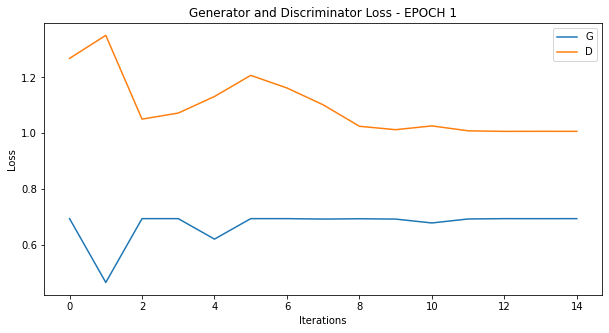

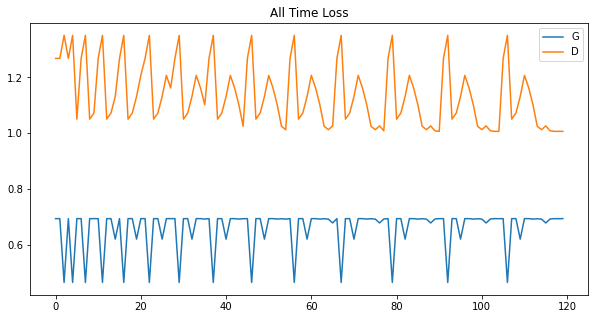

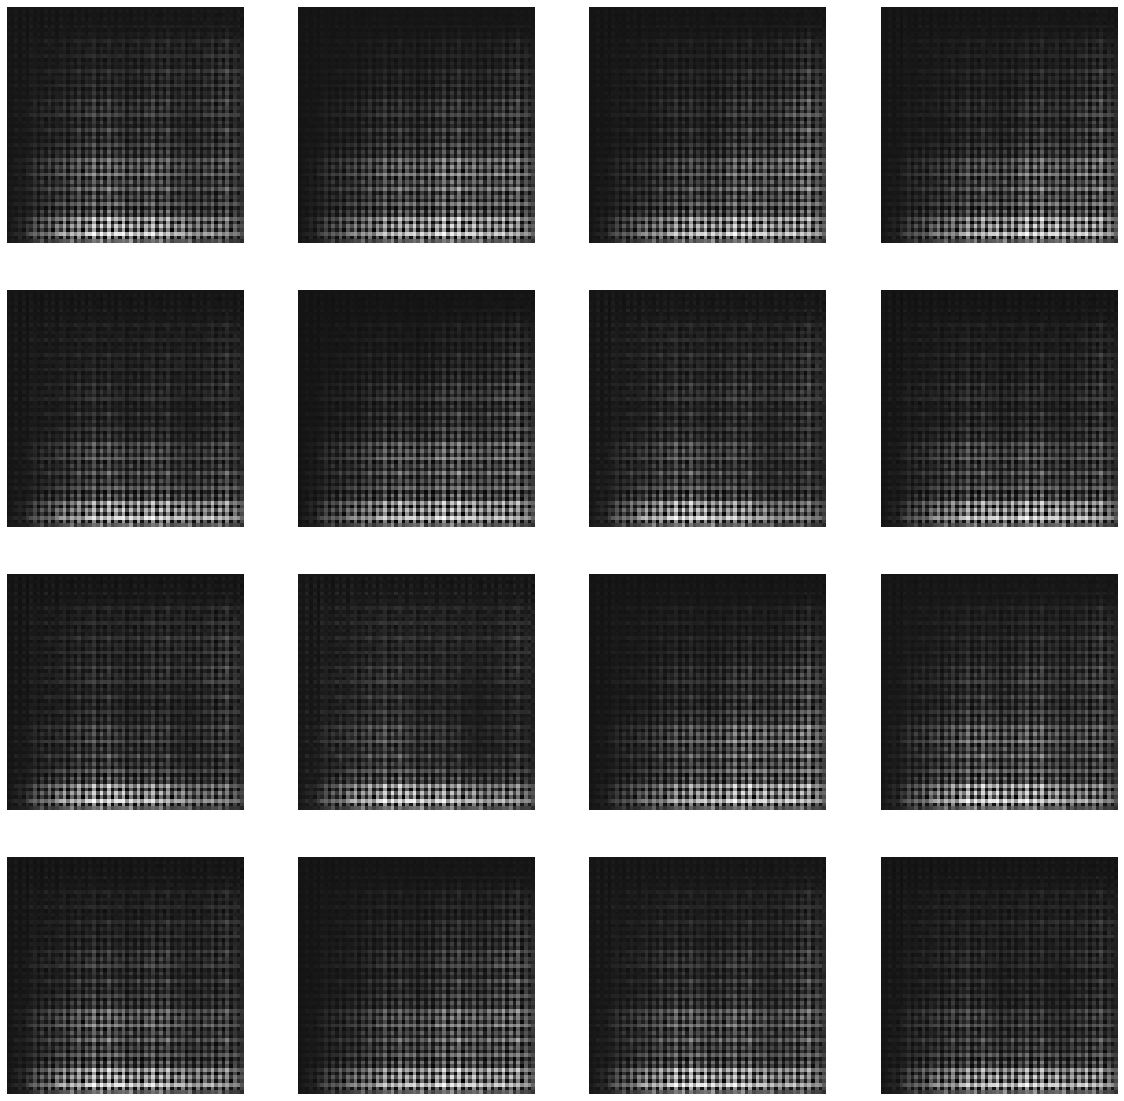

  0%|          | 1/200 [00:06<21:46,  6.56s/it]

Epoch: 1 computed for 6.559208393096924 sec
Gen_loss mean:  0.6715716  std:  0.05843068
Disc_loss mean:  1.0958763  std:  0.10467586


  1%|          | 2/200 [00:11<17:36,  5.34s/it]

Epoch: 2 computed for 4.47315526008606 sec
Gen_loss mean:  0.6923843  std:  0.0009255245
Disc_loss mean:  1.007377  std:  0.0011085188


  2%|▏         | 3/200 [00:15<16:17,  4.96s/it]

Epoch: 3 computed for 4.517253160476685 sec
Gen_loss mean:  0.6731306  std:  0.052413017
Disc_loss mean:  1.3163191  std:  0.079544514


  2%|▏         | 4/200 [00:20<15:38,  4.79s/it]

Epoch: 4 computed for 4.512684106826782 sec
Gen_loss mean:  0.69257385  std:  0.000886348
Disc_loss mean:  1.0797753  std:  0.053858537


  2%|▎         | 5/200 [00:24<15:14,  4.69s/it]

Epoch: 5 computed for 4.516404867172241 sec
Gen_loss mean:  0.69305867  std:  0.00014585533
Disc_loss mean:  1.006567  std:  0.00024301236


  3%|▎         | 6/200 [00:29<14:58,  4.63s/it]

Epoch: 6 computed for 4.520648956298828 sec
Gen_loss mean:  0.6930868  std:  9.4221345e-05
Disc_loss mean:  1.0064777  std:  9.5562886e-05


  4%|▎         | 7/200 [00:33<14:53,  4.63s/it]

Epoch: 7 computed for 4.615699768066406 sec
Gen_loss mean:  0.69310874  std:  5.8531634e-05
Disc_loss mean:  1.006453  std:  6.194673e-05


  4%|▍         | 8/200 [00:38<14:42,  4.60s/it]

Epoch: 8 computed for 4.522496700286865 sec
Gen_loss mean:  0.6931084  std:  6.0041817e-05
Disc_loss mean:  1.0064553  std:  5.9109556e-05


  4%|▍         | 9/200 [00:42<14:33,  4.57s/it]

Epoch: 9 computed for 4.523833513259888 sec
Gen_loss mean:  0.69307923  std:  0.00019122592
Disc_loss mean:  1.0064832  std:  0.00019322326


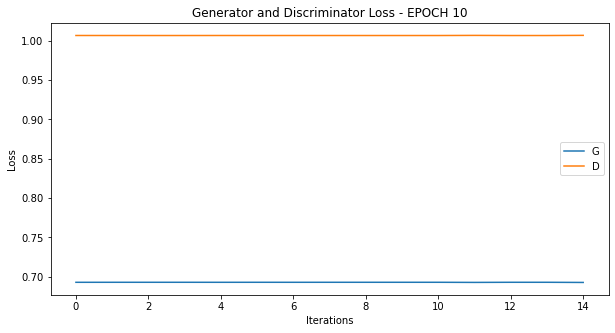

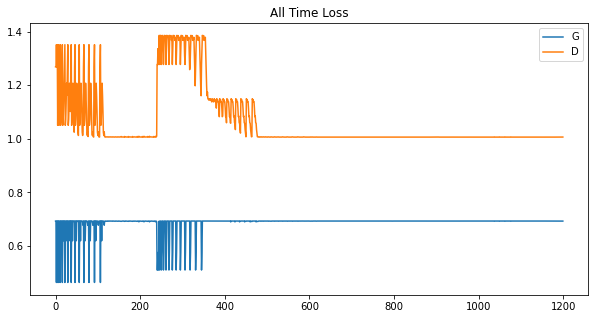

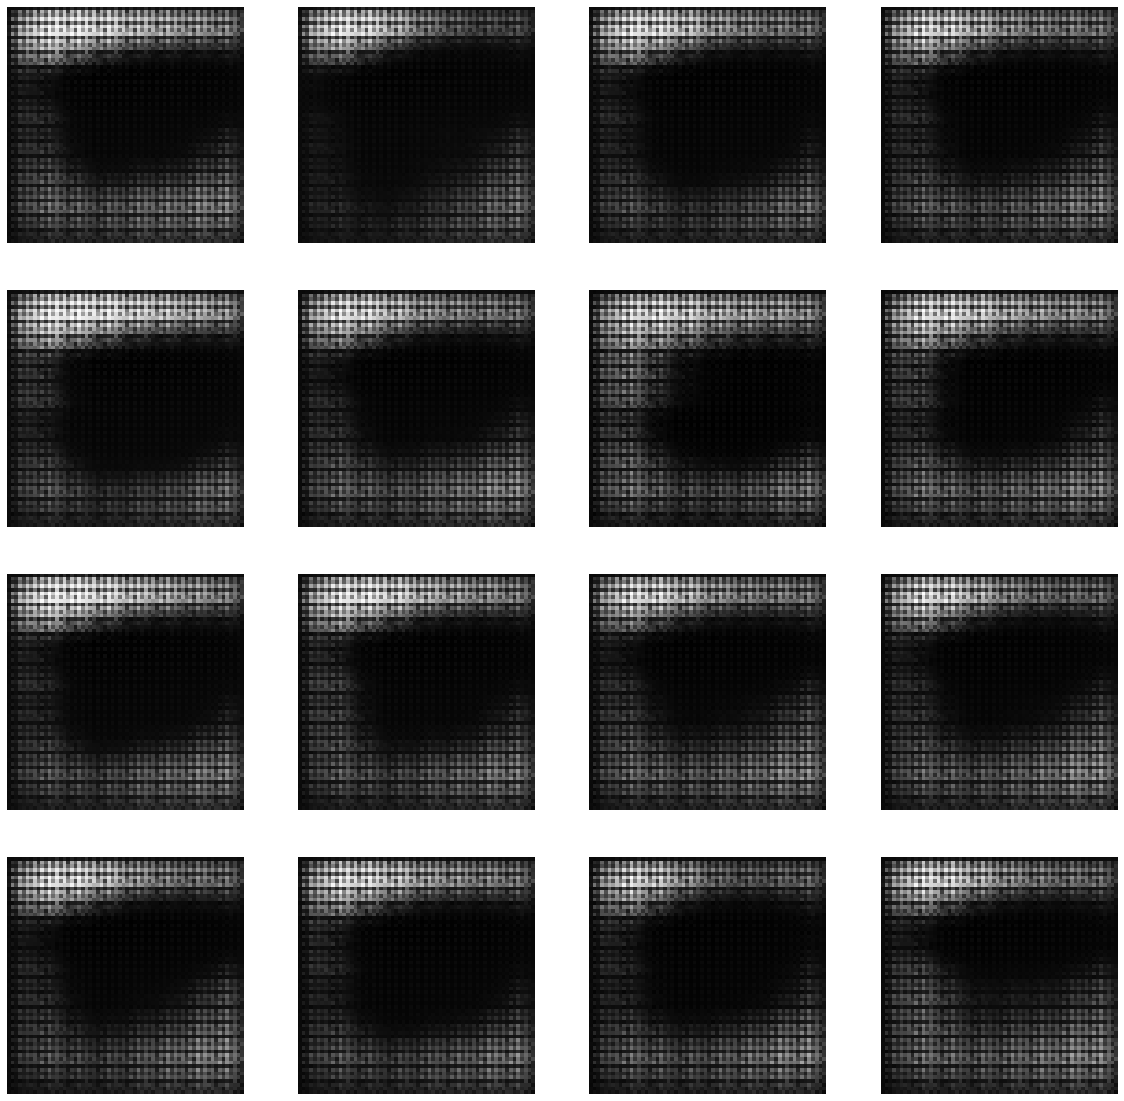

  5%|▌         | 10/200 [00:49<16:15,  5.14s/it]

Epoch: 10 computed for 6.3898491859436035 sec
Gen_loss mean:  0.69311243  std:  6.0401988e-05
Disc_loss mean:  1.0064465  std:  6.0325838e-05


  6%|▌         | 11/200 [00:53<15:36,  4.95s/it]

Epoch: 11 computed for 4.538416385650635 sec
Gen_loss mean:  0.6931373  std:  1.04292685e-05
Disc_loss mean:  1.0064234  std:  1.0672483e-05


  6%|▌         | 12/200 [00:58<15:06,  4.82s/it]

Epoch: 12 computed for 4.524627447128296 sec
Gen_loss mean:  0.6931175  std:  4.215475e-05
Disc_loss mean:  1.0064493  std:  4.7528123e-05


  6%|▋         | 13/200 [01:02<14:45,  4.73s/it]

Epoch: 13 computed for 4.520189523696899 sec
Gen_loss mean:  0.69313055  std:  3.2296364e-05
Disc_loss mean:  1.0064303  std:  3.1877287e-05


  7%|▋         | 14/200 [01:07<14:34,  4.70s/it]

Epoch: 14 computed for 4.622951030731201 sec
Gen_loss mean:  0.6931237  std:  3.6680434e-05
Disc_loss mean:  1.0064341  std:  3.766771e-05


  8%|▊         | 15/200 [01:11<14:19,  4.64s/it]

Epoch: 15 computed for 4.508159160614014 sec
Gen_loss mean:  0.6931331  std:  3.1687625e-05
Disc_loss mean:  1.0064262  std:  3.119441e-05


  8%|▊         | 16/200 [01:16<14:07,  4.61s/it]

Epoch: 16 computed for 4.52110481262207 sec
Gen_loss mean:  0.6931225  std:  4.1212632e-05
Disc_loss mean:  1.006436  std:  4.2387288e-05


  8%|▊         | 17/200 [01:20<13:58,  4.58s/it]

Epoch: 17 computed for 4.523907661437988 sec
Gen_loss mean:  0.69311875  std:  7.373709e-05
Disc_loss mean:  1.00644  std:  7.403983e-05


  9%|▉         | 18/200 [01:26<14:19,  4.72s/it]

Epoch: 18 computed for 5.047360181808472 sec
Gen_loss mean:  0.6931163  std:  4.7985715e-05
Disc_loss mean:  1.006443  std:  4.7952104e-05


 10%|▉         | 19/200 [01:30<14:05,  4.67s/it]

Epoch: 19 computed for 4.5379016399383545 sec
Gen_loss mean:  0.6931417  std:  9.379898e-06
Disc_loss mean:  1.0064162  std:  1.0855379e-05


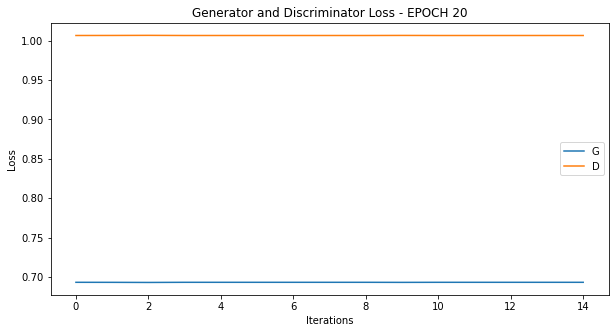

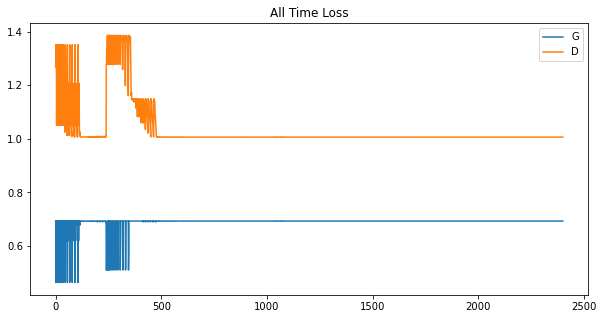

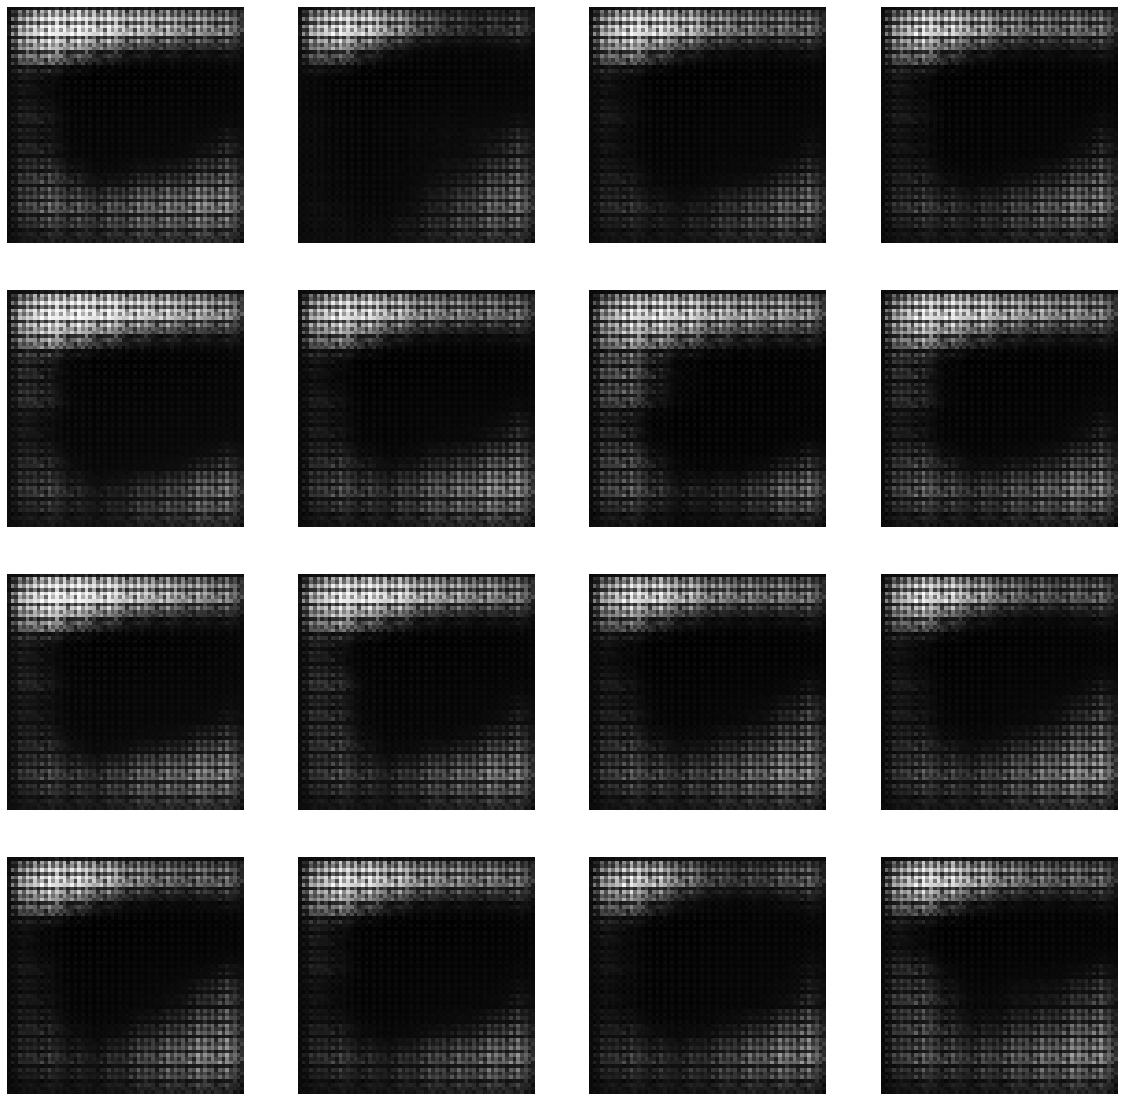

 10%|█         | 20/200 [01:36<15:35,  5.20s/it]

Epoch: 20 computed for 6.431519031524658 sec
Gen_loss mean:  0.6931253  std:  4.7939997e-05
Disc_loss mean:  1.006434  std:  4.859289e-05


 10%|█         | 21/200 [01:41<14:56,  5.01s/it]

Epoch: 21 computed for 4.553776979446411 sec
Gen_loss mean:  0.6931077  std:  9.05124e-05
Disc_loss mean:  1.006454  std:  9.054876e-05


 11%|█         | 22/200 [01:46<14:25,  4.86s/it]

Epoch: 22 computed for 4.51494574546814 sec
Gen_loss mean:  0.6931239  std:  3.633047e-05
Disc_loss mean:  1.0064348  std:  3.5715057e-05


 12%|█▏        | 23/200 [01:50<14:07,  4.79s/it]

Epoch: 23 computed for 4.619709491729736 sec
Gen_loss mean:  0.69309235  std:  0.00014535052
Disc_loss mean:  1.0064706  std:  0.00015274128


 12%|█▏        | 24/200 [01:55<13:48,  4.71s/it]

Epoch: 24 computed for 4.513028860092163 sec
Gen_loss mean:  0.69312567  std:  3.8413298e-05
Disc_loss mean:  1.0064347  std:  3.815235e-05


 12%|█▎        | 25/200 [01:59<13:33,  4.65s/it]

Epoch: 25 computed for 4.515519857406616 sec
Gen_loss mean:  0.6931191  std:  7.914098e-05
Disc_loss mean:  1.0064443  std:  9.6406875e-05


 13%|█▎        | 26/200 [02:04<13:22,  4.61s/it]

Epoch: 26 computed for 4.514874458312988 sec
Gen_loss mean:  0.6931232  std:  2.83172e-05
Disc_loss mean:  1.006436  std:  2.879701e-05


 14%|█▎        | 27/200 [02:08<13:13,  4.58s/it]

Epoch: 27 computed for 4.521045684814453 sec
Gen_loss mean:  0.6931095  std:  6.589344e-05
Disc_loss mean:  1.00645  std:  6.521268e-05


 14%|█▍        | 28/200 [02:13<13:05,  4.57s/it]

Epoch: 28 computed for 4.520287036895752 sec
Gen_loss mean:  0.69312257  std:  4.163027e-05
Disc_loss mean:  1.0064391  std:  4.15163e-05


 14%|█▍        | 29/200 [02:17<12:58,  4.55s/it]

Epoch: 29 computed for 4.517816781997681 sec
Gen_loss mean:  0.69312626  std:  4.4159315e-05
Disc_loss mean:  1.0064563  std:  0.000101735175


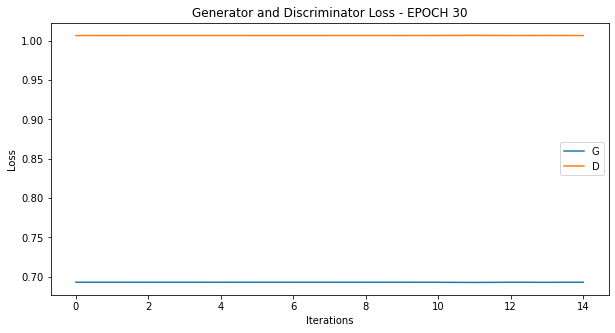

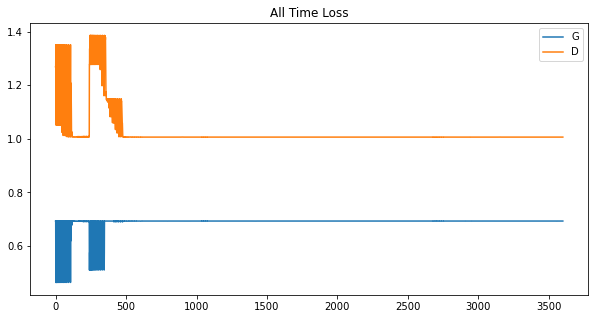

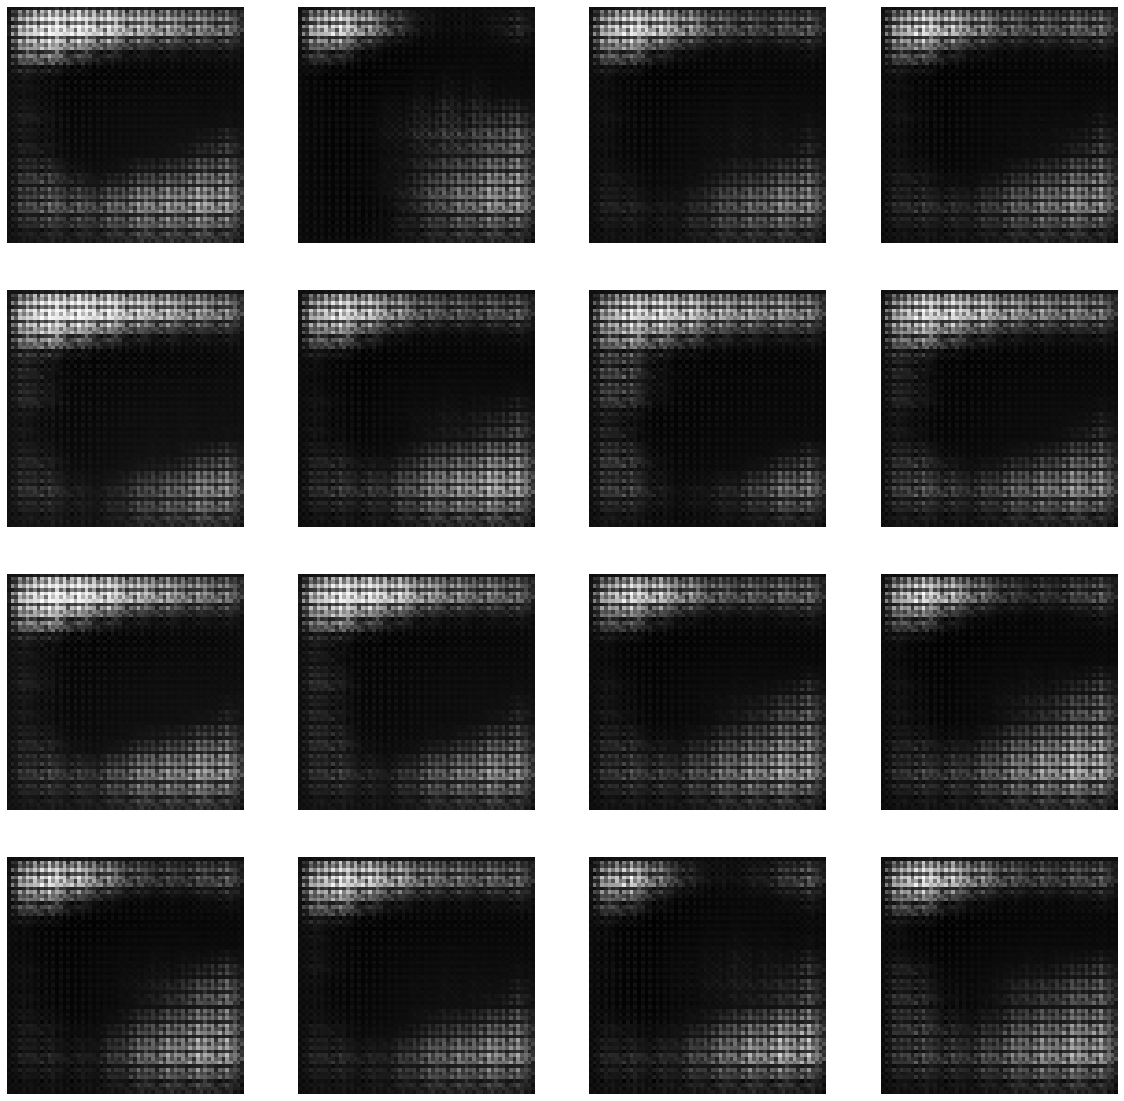

 15%|█▌        | 30/200 [02:24<14:29,  5.11s/it]

Epoch: 30 computed for 6.41480565071106 sec
Gen_loss mean:  0.6931075  std:  6.6663895e-05
Disc_loss mean:  1.00645  std:  6.750025e-05


 16%|█▌        | 31/200 [02:28<13:54,  4.94s/it]

Epoch: 31 computed for 4.524256229400635 sec
Gen_loss mean:  0.6931325  std:  2.329422e-05
Disc_loss mean:  1.0064262  std:  2.309075e-05


 16%|█▌        | 32/200 [02:33<13:33,  4.84s/it]

Epoch: 32 computed for 4.625890493392944 sec
Gen_loss mean:  0.69312215  std:  4.9367718e-05
Disc_loss mean:  1.0064363  std:  4.8896218e-05


 16%|█▋        | 33/200 [02:37<13:12,  4.75s/it]

Epoch: 33 computed for 4.515677452087402 sec
Gen_loss mean:  0.6931049  std:  0.000118376876
Disc_loss mean:  1.0064532  std:  0.00011921241


 17%|█▋        | 34/200 [02:42<12:56,  4.68s/it]

Epoch: 34 computed for 4.514425277709961 sec
Gen_loss mean:  0.6931173  std:  5.893215e-05
Disc_loss mean:  1.0064427  std:  5.8338937e-05


 18%|█▊        | 35/200 [02:47<12:48,  4.66s/it]

Epoch: 35 computed for 4.607166051864624 sec
Gen_loss mean:  0.6931121  std:  8.042431e-05
Disc_loss mean:  1.0064471  std:  8.039558e-05


 18%|█▊        | 36/200 [02:51<12:37,  4.62s/it]

Epoch: 36 computed for 4.519412517547607 sec
Gen_loss mean:  0.69314307  std:  5.471044e-06
Disc_loss mean:  1.0064169  std:  7.1941595e-06


 18%|█▊        | 37/200 [02:56<12:28,  4.59s/it]

Epoch: 37 computed for 4.52039909362793 sec
Gen_loss mean:  0.6931407  std:  1.2984112e-05
Disc_loss mean:  1.0064217  std:  1.9835581e-05


 19%|█▉        | 38/200 [03:00<12:20,  4.57s/it]

Epoch: 38 computed for 4.517972707748413 sec
Gen_loss mean:  0.6931272  std:  6.075112e-05
Disc_loss mean:  1.0064328  std:  6.086104e-05


 20%|█▉        | 39/200 [03:05<12:12,  4.55s/it]

Epoch: 39 computed for 4.508603096008301 sec
Gen_loss mean:  0.6931465  std:  5.698404e-07
Disc_loss mean:  1.0064135  std:  5.8849637e-06


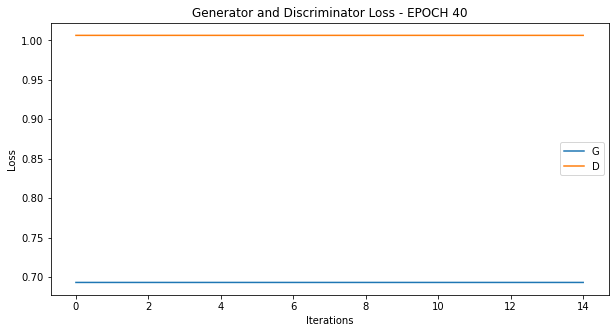

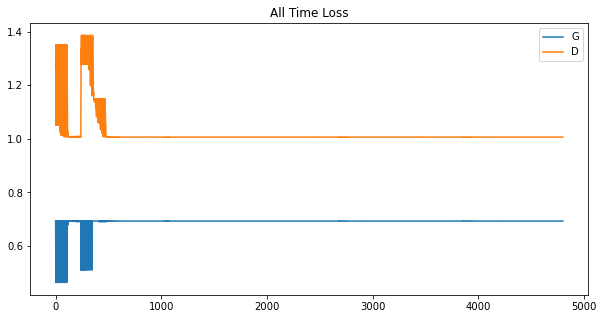

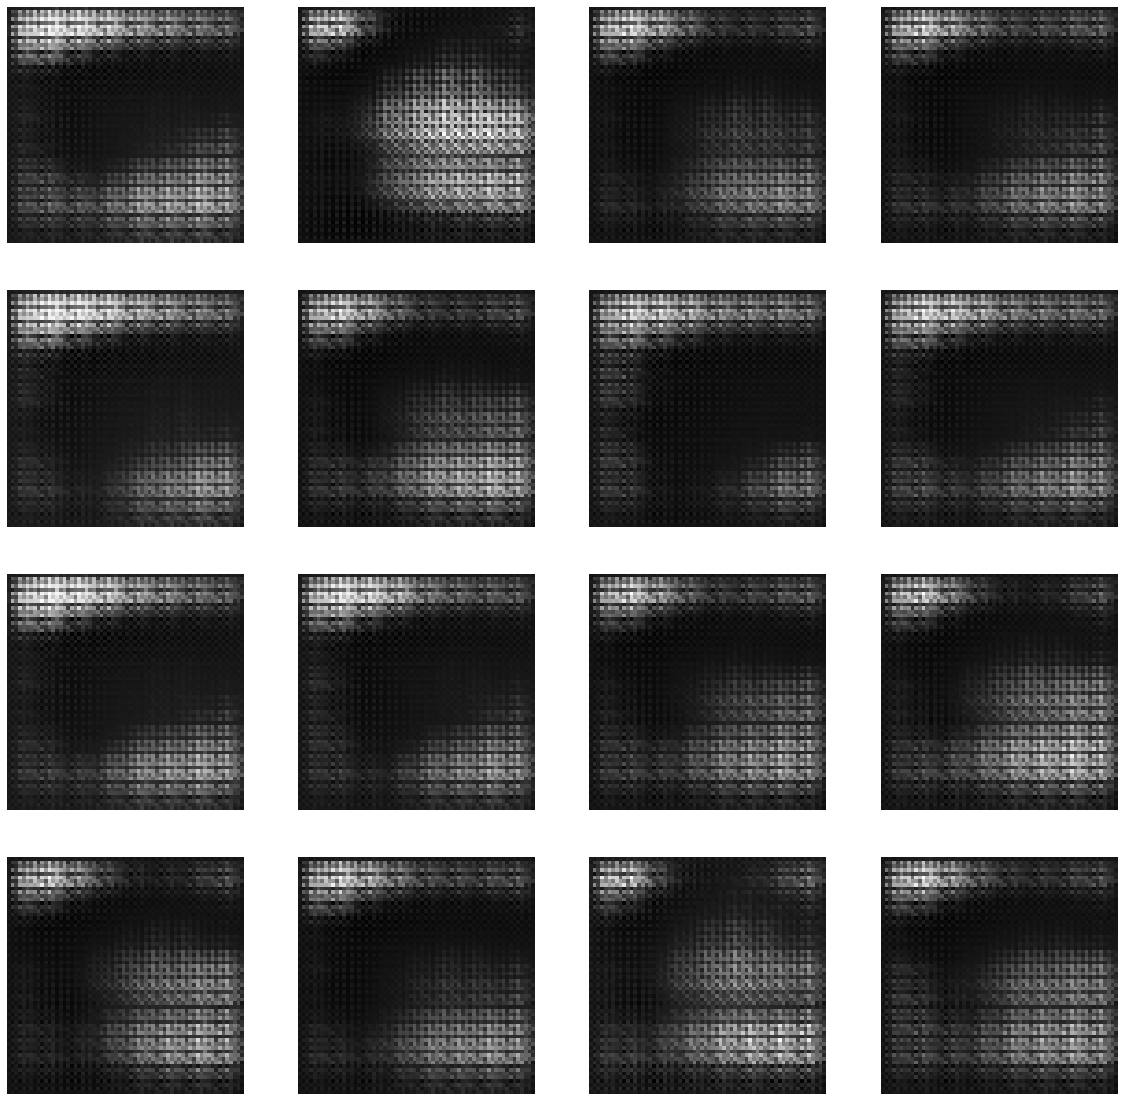

 20%|██        | 40/200 [03:11<13:36,  5.11s/it]

Epoch: 40 computed for 6.394723415374756 sec
Gen_loss mean:  0.6931456  std:  2.5715335e-06
Disc_loss mean:  1.0064125  std:  3.4386594e-06


 20%|██        | 41/200 [03:16<13:05,  4.94s/it]

Epoch: 41 computed for 4.547479152679443 sec
Gen_loss mean:  0.6931459  std:  1.4363771e-06
Disc_loss mean:  1.0064247  std:  4.7037876e-05


 21%|██        | 42/200 [03:20<12:45,  4.84s/it]

Epoch: 42 computed for 4.619504690170288 sec
Gen_loss mean:  0.69314545  std:  2.7505678e-06
Disc_loss mean:  1.0064127  std:  3.9235374e-06


 22%|██▏       | 43/200 [03:25<12:25,  4.75s/it]

Epoch: 43 computed for 4.5150721073150635 sec
Gen_loss mean:  0.6931455  std:  1.9788981e-06
Disc_loss mean:  1.0064121  std:  3.299033e-06


 22%|██▏       | 44/200 [03:29<12:10,  4.68s/it]

Epoch: 44 computed for 4.525691032409668 sec
Gen_loss mean:  0.6931438  std:  5.445073e-06
Disc_loss mean:  1.0064132  std:  5.9545805e-06


 22%|██▎       | 45/200 [03:34<11:57,  4.63s/it]

Epoch: 45 computed for 4.512460947036743 sec
Gen_loss mean:  0.6931439  std:  7.1127765e-06
Disc_loss mean:  1.0064127  std:  7.0101414e-06


 23%|██▎       | 46/200 [03:38<11:47,  4.60s/it]

Epoch: 46 computed for 4.511760950088501 sec
Gen_loss mean:  0.69314486  std:  5.536755e-06
Disc_loss mean:  1.0064119  std:  5.9046515e-06


 24%|██▎       | 47/200 [03:43<11:39,  4.57s/it]

Epoch: 47 computed for 4.516522407531738 sec
Gen_loss mean:  0.69314384  std:  7.090648e-06
Disc_loss mean:  1.0064129  std:  6.9927537e-06


 24%|██▍       | 48/200 [03:47<11:33,  4.56s/it]

Epoch: 48 computed for 4.528809070587158 sec
Gen_loss mean:  0.69314635  std:  8.832757e-07
Disc_loss mean:  1.0064105  std:  1.5919387e-06


 24%|██▍       | 49/200 [03:52<11:26,  4.55s/it]

Epoch: 49 computed for 4.506519317626953 sec
Gen_loss mean:  0.69314563  std:  2.8759678e-06
Disc_loss mean:  1.0064108  std:  2.800615e-06


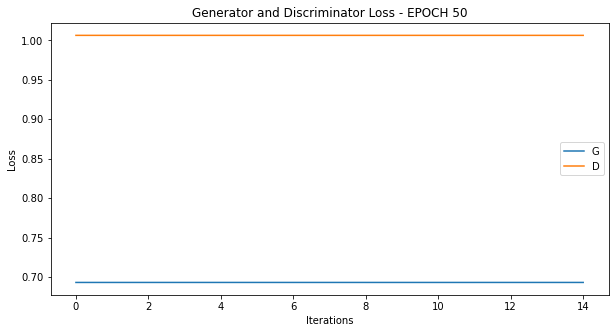

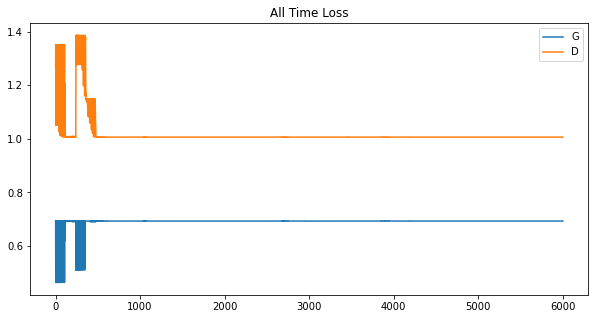

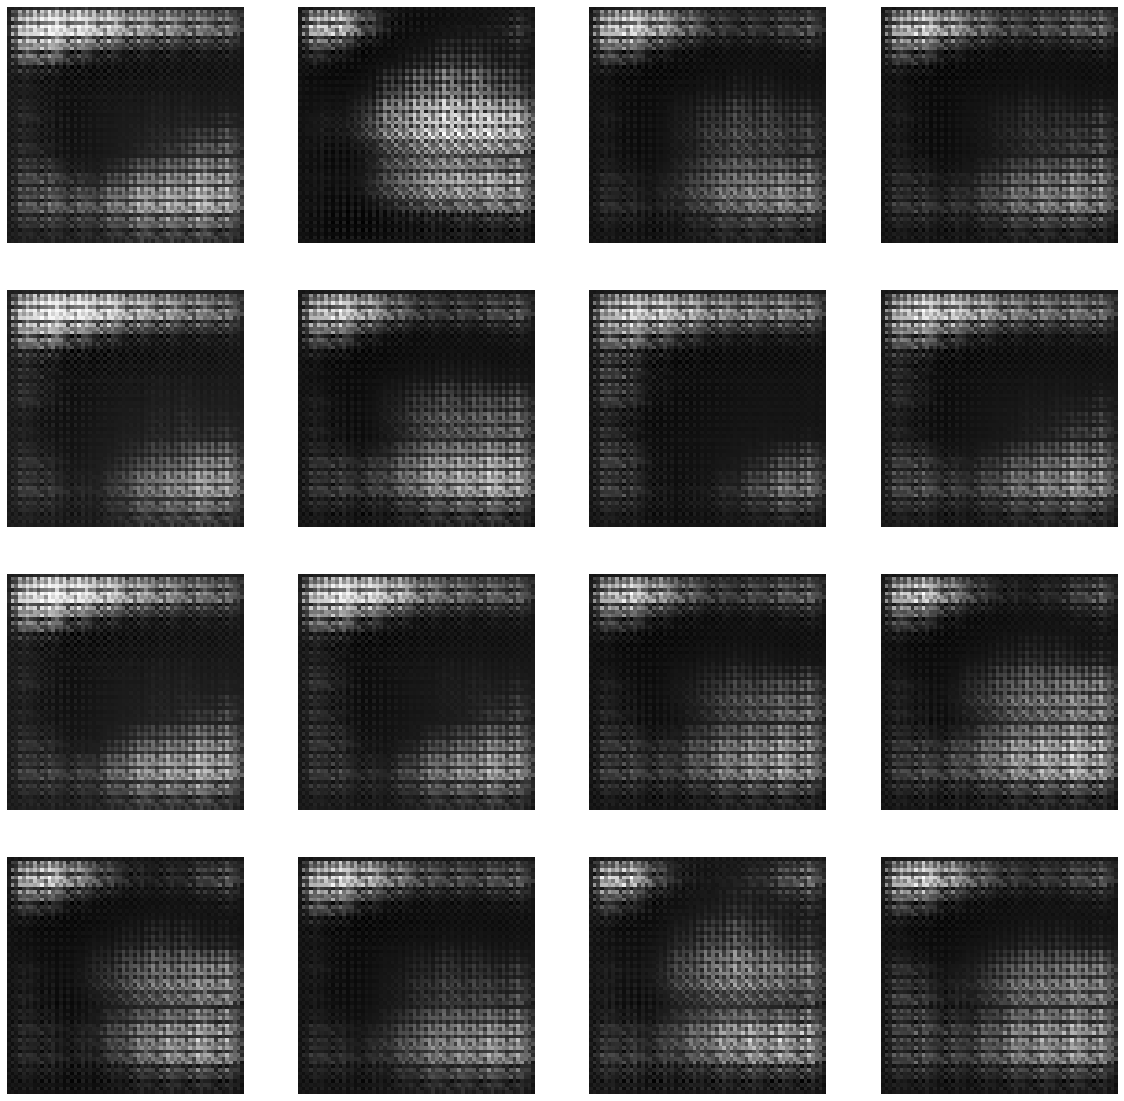

 25%|██▌       | 50/200 [03:58<12:45,  5.10s/it]

Epoch: 50 computed for 6.404589653015137 sec
Gen_loss mean:  0.6931459  std:  1.9715237e-06
Disc_loss mean:  1.0064107  std:  2.122461e-06


 26%|██▌       | 51/200 [04:03<12:20,  4.97s/it]

Epoch: 51 computed for 4.643852472305298 sec
Gen_loss mean:  0.69314677  std:  7.5316e-07
Disc_loss mean:  1.00641  std:  9.269752e-07


 26%|██▌       | 52/200 [04:07<11:54,  4.83s/it]

Epoch: 52 computed for 4.506927013397217 sec
Gen_loss mean:  0.6931451  std:  3.2306964e-06
Disc_loss mean:  1.0064118  std:  3.794153e-06


 26%|██▋       | 53/200 [04:12<11:36,  4.74s/it]

Epoch: 53 computed for 4.512152194976807 sec
Gen_loss mean:  0.693146  std:  1.0031777e-06
Disc_loss mean:  1.0064107  std:  1.3685725e-06


 27%|██▋       | 54/200 [04:17<11:44,  4.82s/it]

Epoch: 54 computed for 5.027526378631592 sec
Gen_loss mean:  0.693145  std:  3.0253882e-06
Disc_loss mean:  1.0064118  std:  3.1024965e-06


 28%|██▊       | 55/200 [04:21<11:27,  4.74s/it]

Epoch: 55 computed for 4.553299427032471 sec
Gen_loss mean:  0.69314563  std:  3.7246307e-06
Disc_loss mean:  1.0064108  std:  3.7924046e-06


 28%|██▊       | 56/200 [04:26<11:15,  4.69s/it]

Epoch: 56 computed for 4.571148633956909 sec
Gen_loss mean:  0.693146  std:  1.3382095e-06
Disc_loss mean:  1.0064102  std:  1.3730647e-06


 28%|██▊       | 57/200 [04:31<11:03,  4.64s/it]

Epoch: 57 computed for 4.520531415939331 sec
Gen_loss mean:  0.6931461  std:  1.3907184e-06
Disc_loss mean:  1.0064104  std:  1.5031719e-06


 29%|██▉       | 58/200 [04:35<10:54,  4.61s/it]

Epoch: 58 computed for 4.521097660064697 sec
Gen_loss mean:  0.69314665  std:  6.434357e-07
Disc_loss mean:  1.0064099  std:  9.2799667e-07


 30%|██▉       | 59/200 [04:40<10:46,  4.58s/it]

Epoch: 59 computed for 4.520968675613403 sec
Gen_loss mean:  0.69314516  std:  2.7268718e-06
Disc_loss mean:  1.0064112  std:  2.6334192e-06


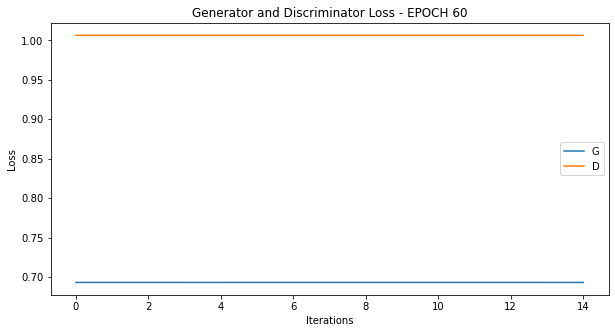

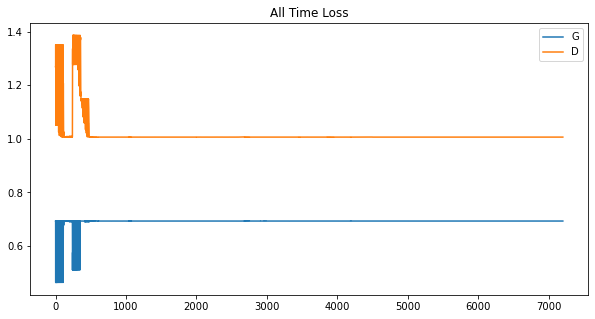

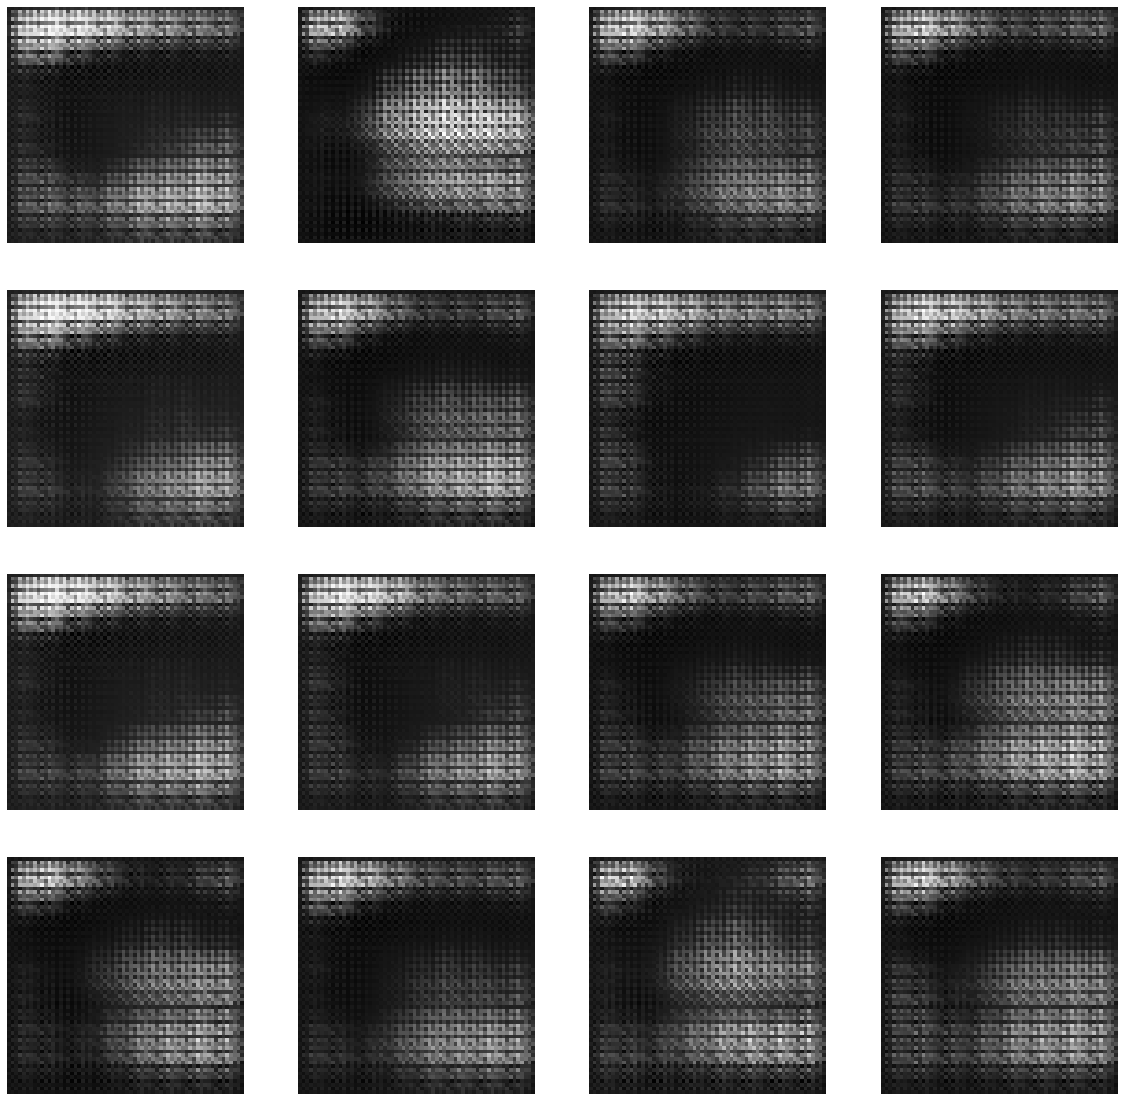

 30%|███       | 60/200 [04:46<11:58,  5.13s/it]

Epoch: 60 computed for 6.413727521896362 sec
Gen_loss mean:  0.69314647  std:  9.4016764e-07
Disc_loss mean:  1.0064101  std:  9.34102e-07


 30%|███       | 61/200 [04:51<11:32,  4.98s/it]

Epoch: 61 computed for 4.63669753074646 sec
Gen_loss mean:  0.69314426  std:  6.9199086e-06
Disc_loss mean:  1.0064121  std:  6.882689e-06


 31%|███       | 62/200 [04:55<11:08,  4.84s/it]

Epoch: 62 computed for 4.509020805358887 sec
Gen_loss mean:  0.69314617  std:  1.9569939e-06
Disc_loss mean:  1.0064102  std:  1.967495e-06


 32%|███▏      | 63/200 [05:00<10:50,  4.75s/it]

Epoch: 63 computed for 4.513551235198975 sec
Gen_loss mean:  0.69314647  std:  7.6035843e-07
Disc_loss mean:  1.00641  std:  7.2315936e-07


 32%|███▏      | 64/200 [05:04<10:36,  4.68s/it]

Epoch: 64 computed for 4.514422416687012 sec
Gen_loss mean:  0.6931456  std:  3.6665658e-06
Disc_loss mean:  1.0064114  std:  3.7326026e-06


 32%|███▎      | 65/200 [05:09<10:25,  4.63s/it]

Epoch: 65 computed for 4.519702672958374 sec
Gen_loss mean:  0.6931465  std:  7.806464e-07
Disc_loss mean:  1.0064102  std:  1.7012576e-06


 33%|███▎      | 66/200 [05:13<10:15,  4.60s/it]

Epoch: 66 computed for 4.514567613601685 sec
Gen_loss mean:  0.6931465  std:  6.402993e-07
Disc_loss mean:  1.00641  std:  1.3170693e-06


 34%|███▎      | 67/200 [05:18<10:08,  4.57s/it]

Epoch: 67 computed for 4.516038179397583 sec
Gen_loss mean:  0.6931435  std:  1.0331464e-05
Disc_loss mean:  1.0064131  std:  1.0225119e-05


 34%|███▍      | 68/200 [05:22<10:01,  4.56s/it]

Epoch: 68 computed for 4.51152491569519 sec
Gen_loss mean:  0.6931465  std:  7.9701016e-07
Disc_loss mean:  1.0064096  std:  7.425504e-07


 34%|███▍      | 69/200 [05:27<09:55,  4.55s/it]

Epoch: 69 computed for 4.522555351257324 sec
Gen_loss mean:  0.6931461  std:  2.186226e-06
Disc_loss mean:  1.0064105  std:  2.468333e-06


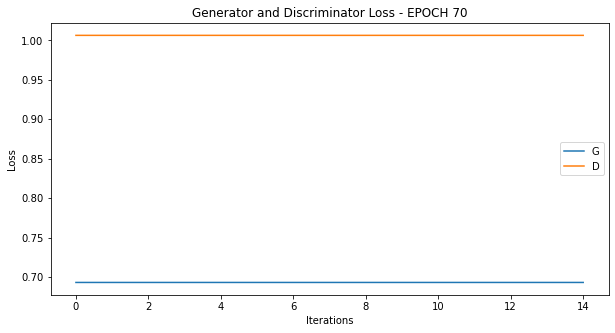

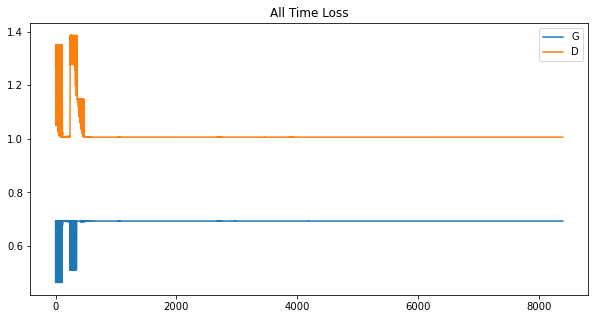

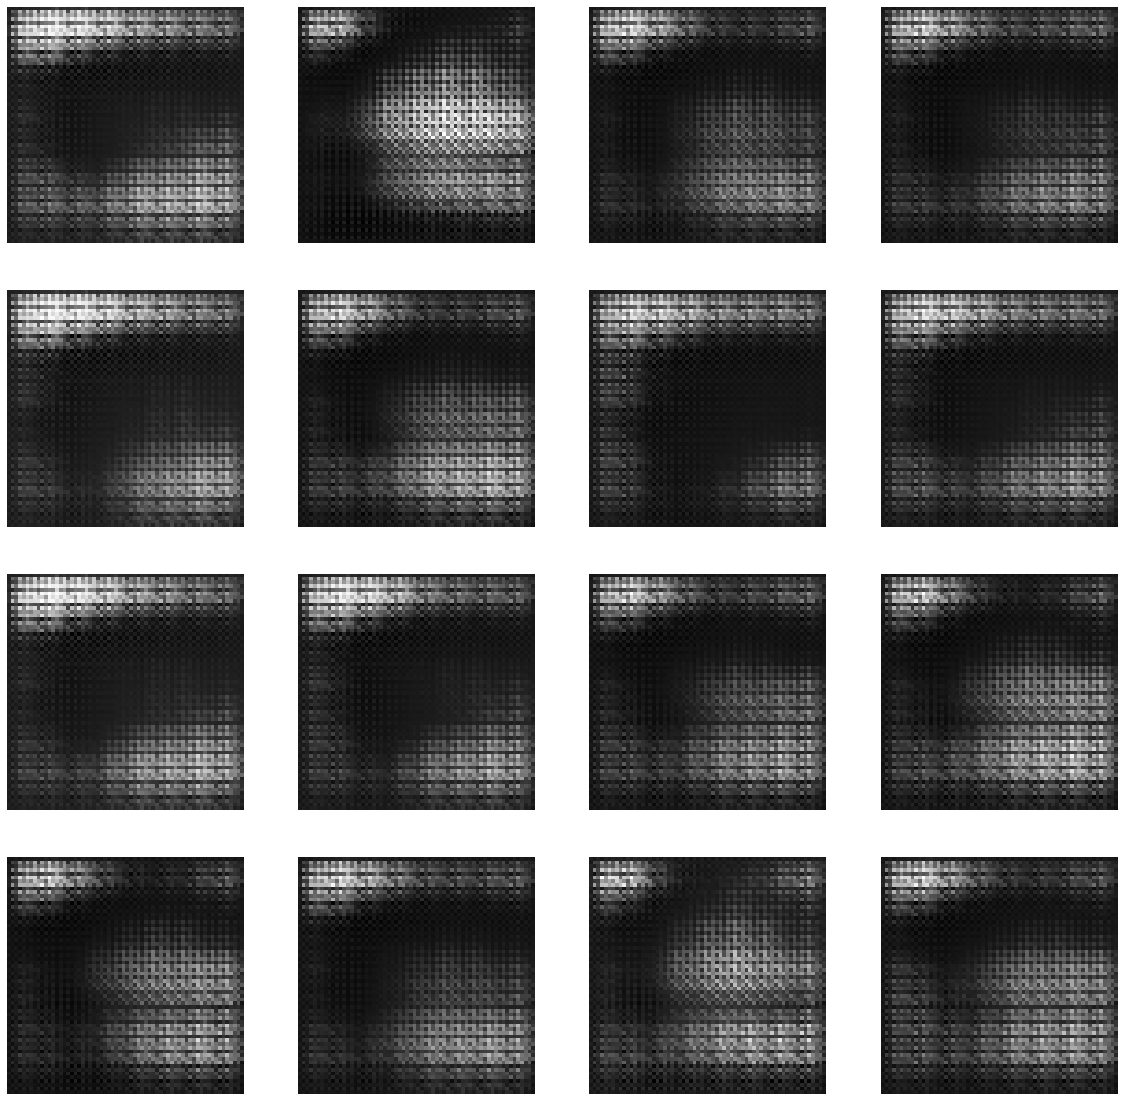

 35%|███▌      | 70/200 [05:33<11:03,  5.11s/it]

Epoch: 70 computed for 6.4085211753845215 sec
Gen_loss mean:  0.6931469  std:  2.9960847e-07
Disc_loss mean:  1.0064098  std:  1.029626e-06


 36%|███▌      | 71/200 [05:38<10:40,  4.96s/it]

Epoch: 71 computed for 4.629108905792236 sec
Gen_loss mean:  0.69314617  std:  1.5895565e-06
Disc_loss mean:  1.0064102  std:  1.6379895e-06


 36%|███▌      | 72/200 [05:42<10:18,  4.83s/it]

Epoch: 72 computed for 4.508632659912109 sec
Gen_loss mean:  0.69314563  std:  3.0128758e-06
Disc_loss mean:  1.0064108  std:  2.9466646e-06


 36%|███▋      | 73/200 [05:47<10:04,  4.76s/it]

Epoch: 73 computed for 4.595518589019775 sec
Gen_loss mean:  0.6931467  std:  4.6730446e-07
Disc_loss mean:  1.0064095  std:  6.1173455e-07


 37%|███▋      | 74/200 [05:52<09:51,  4.69s/it]

Epoch: 74 computed for 4.527635097503662 sec
Gen_loss mean:  0.69314575  std:  3.272543e-06
Disc_loss mean:  1.0064107  std:  3.6990753e-06


 38%|███▊      | 75/200 [05:56<09:40,  4.64s/it]

Epoch: 75 computed for 4.518810987472534 sec
Gen_loss mean:  0.6931467  std:  6.569142e-07
Disc_loss mean:  1.0064099  std:  8.1260754e-07


 38%|███▊      | 76/200 [06:01<09:31,  4.60s/it]

Epoch: 76 computed for 4.518948554992676 sec
Gen_loss mean:  0.69314545  std:  3.3753286e-06
Disc_loss mean:  1.0064113  std:  3.747295e-06


 38%|███▊      | 77/200 [06:05<09:23,  4.58s/it]

Epoch: 77 computed for 4.524923801422119 sec
Gen_loss mean:  0.69314444  std:  4.4362837e-06
Disc_loss mean:  1.0064119  std:  4.974233e-06


 39%|███▉      | 78/200 [06:10<09:16,  4.56s/it]

Epoch: 78 computed for 4.506645441055298 sec
Gen_loss mean:  0.69314617  std:  1.7825676e-06
Disc_loss mean:  1.0064102  std:  2.1320363e-06


 40%|███▉      | 79/200 [06:14<09:10,  4.55s/it]

Epoch: 79 computed for 4.5125861167907715 sec
Gen_loss mean:  0.69314665  std:  7.1740493e-07
Disc_loss mean:  1.0064095  std:  7.172398e-07


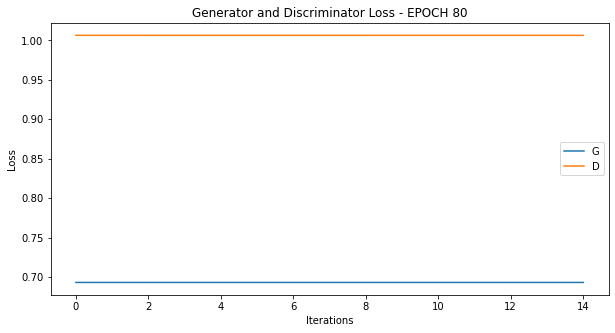

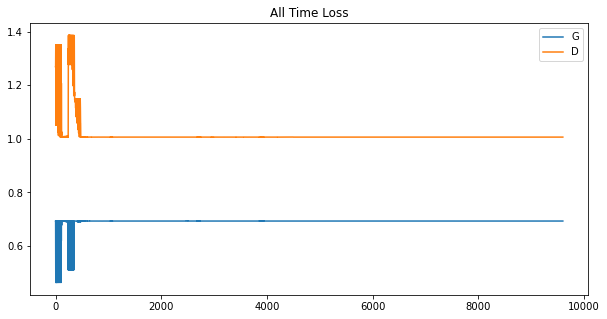

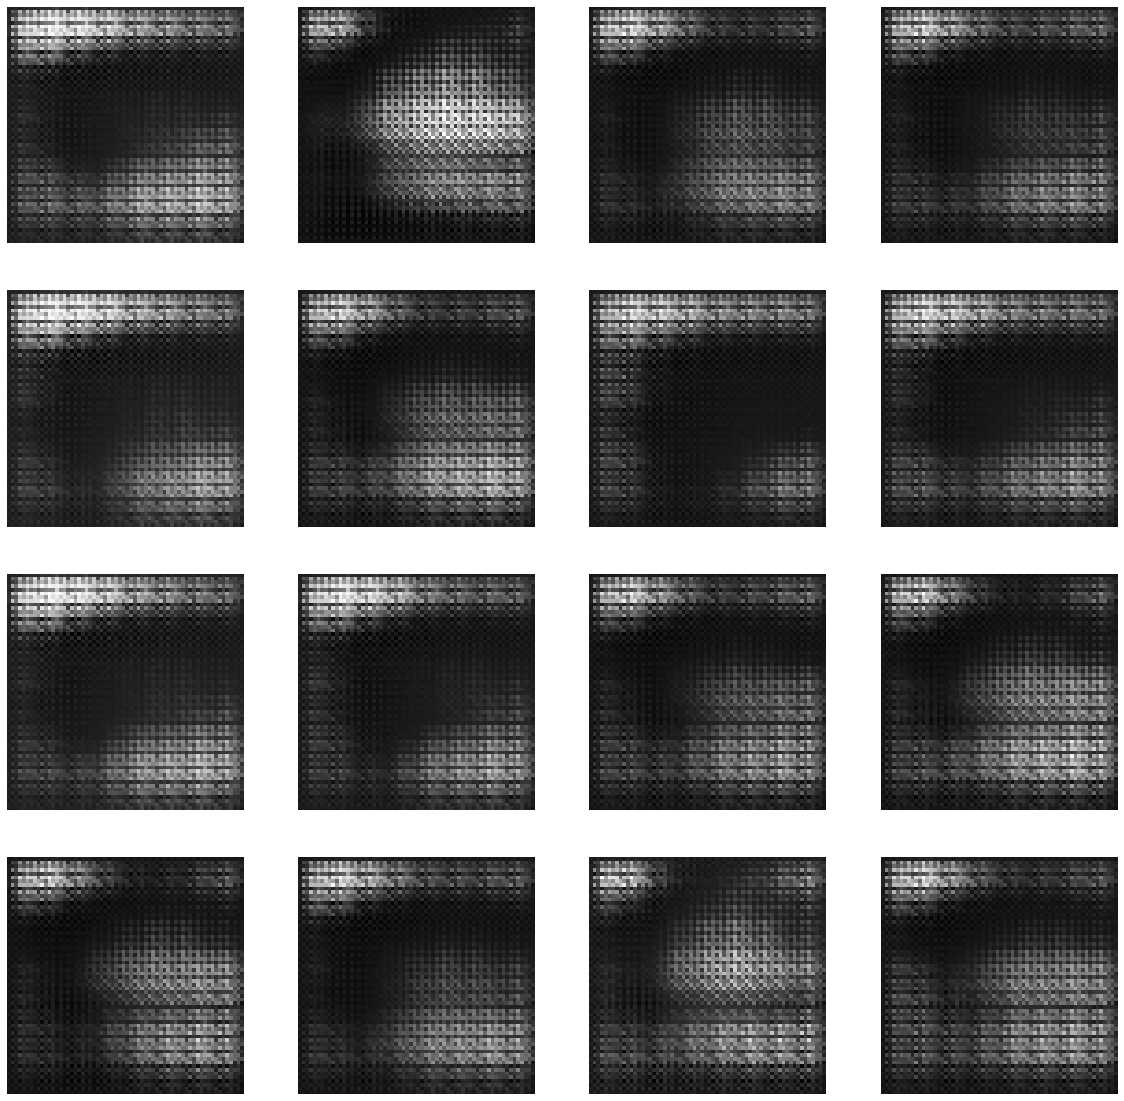

 40%|████      | 80/200 [06:21<10:12,  5.11s/it]

Epoch: 80 computed for 6.409963369369507 sec
Gen_loss mean:  0.6931465  std:  1.1135066e-06
Disc_loss mean:  1.0064096  std:  1.094304e-06


 40%|████      | 81/200 [06:25<09:51,  4.97s/it]

Epoch: 81 computed for 4.650044918060303 sec
Gen_loss mean:  0.693144  std:  7.990225e-06
Disc_loss mean:  1.0064123  std:  7.989573e-06


 41%|████      | 82/200 [06:30<09:30,  4.83s/it]

Epoch: 82 computed for 4.505335569381714 sec
Gen_loss mean:  0.69314605  std:  1.4501619e-06
Disc_loss mean:  1.0064104  std:  1.6757282e-06


 42%|████▏     | 83/200 [06:34<09:14,  4.74s/it]

Epoch: 83 computed for 4.520657539367676 sec
Gen_loss mean:  0.69314665  std:  5.8197253e-07
Disc_loss mean:  1.0064098  std:  6.0394143e-07


 42%|████▏     | 84/200 [06:39<09:02,  4.67s/it]

Epoch: 84 computed for 4.518860340118408 sec
Gen_loss mean:  0.6931463  std:  2.190447e-06
Disc_loss mean:  1.0064102  std:  2.2880731e-06


 42%|████▎     | 85/200 [06:43<08:52,  4.63s/it]

Epoch: 85 computed for 4.512619733810425 sec
Gen_loss mean:  0.69314563  std:  3.055884e-06
Disc_loss mean:  1.0064107  std:  3.0502983e-06


 43%|████▎     | 86/200 [06:48<08:43,  4.59s/it]

Epoch: 86 computed for 4.5168304443359375 sec
Gen_loss mean:  0.6931451  std:  4.2892434e-06
Disc_loss mean:  1.0064112  std:  4.2638503e-06


 44%|████▎     | 87/200 [06:52<08:36,  4.57s/it]

Epoch: 87 computed for 4.522041320800781 sec
Gen_loss mean:  0.6931469  std:  2.1818882e-07
Disc_loss mean:  1.0064099  std:  2.4504202e-06


 44%|████▍     | 88/200 [06:57<08:30,  4.56s/it]

Epoch: 88 computed for 4.516801118850708 sec
Gen_loss mean:  0.69314593  std:  2.5603647e-06
Disc_loss mean:  1.0064101  std:  2.6456228e-06


 44%|████▍     | 89/200 [07:01<08:24,  4.54s/it]

Epoch: 89 computed for 4.5093629360198975 sec
Gen_loss mean:  0.6931464  std:  1.2232755e-06
Disc_loss mean:  1.0064099  std:  1.2238562e-06


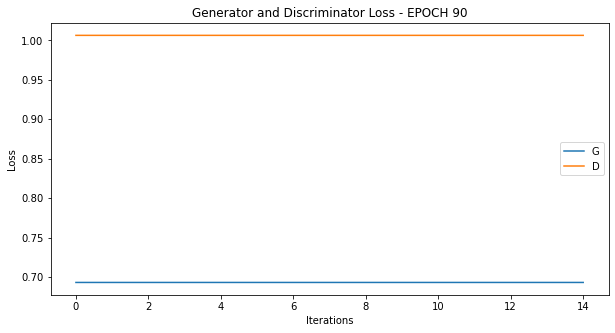

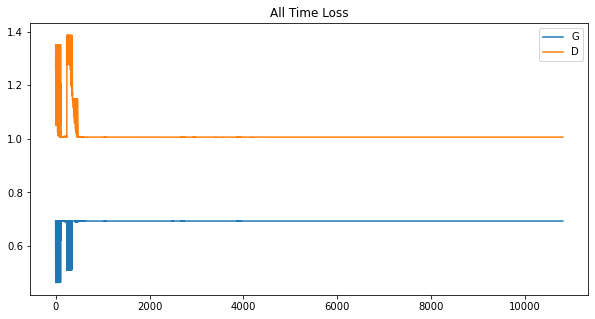

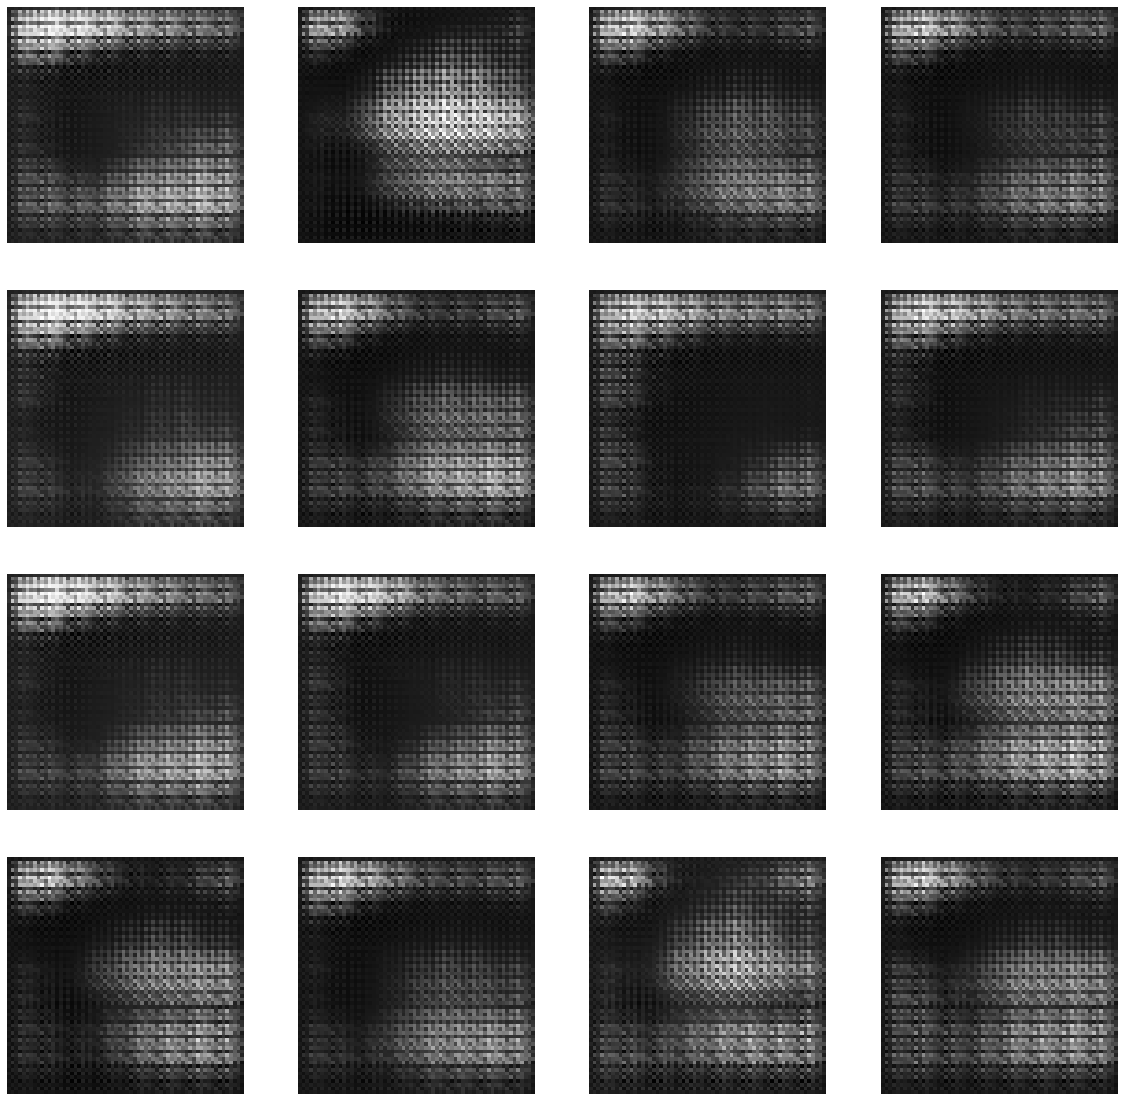

 45%|████▌     | 90/200 [07:08<09:21,  5.11s/it]

Epoch: 90 computed for 6.423909425735474 sec
Gen_loss mean:  0.69314665  std:  7.4605083e-07
Disc_loss mean:  1.0064096  std:  7.2838077e-07


 46%|████▌     | 91/200 [07:12<09:00,  4.96s/it]

Epoch: 91 computed for 4.6162636280059814 sec
Gen_loss mean:  0.69314677  std:  2.7957057e-07
Disc_loss mean:  1.0064093  std:  2.8377485e-07


 46%|████▌     | 92/200 [07:17<08:41,  4.83s/it]

Epoch: 92 computed for 4.52006459236145 sec
Gen_loss mean:  0.6931456  std:  4.4530693e-06
Disc_loss mean:  1.0064106  std:  4.424469e-06


 46%|████▋     | 93/200 [07:21<08:26,  4.74s/it]

Epoch: 93 computed for 4.5145487785339355 sec
Gen_loss mean:  0.6931467  std:  6.2835096e-07
Disc_loss mean:  1.0064095  std:  7.3742933e-07


 47%|████▋     | 94/200 [07:26<08:15,  4.67s/it]

Epoch: 94 computed for 4.510908603668213 sec
Gen_loss mean:  0.69314635  std:  1.5256926e-06
Disc_loss mean:  1.00641  std:  1.5291041e-06


 48%|████▊     | 95/200 [07:30<08:05,  4.63s/it]

Epoch: 95 computed for 4.5191004276275635 sec
Gen_loss mean:  0.6931467  std:  6.198119e-07
Disc_loss mean:  1.0064095  std:  6.194296e-07


 48%|████▊     | 96/200 [07:35<07:57,  4.59s/it]

Epoch: 96 computed for 4.5160744190216064 sec
Gen_loss mean:  0.6931467  std:  7.206988e-07
Disc_loss mean:  1.0064094  std:  6.8411316e-07


 48%|████▊     | 97/200 [07:40<07:51,  4.57s/it]

Epoch: 97 computed for 4.52240777015686 sec
Gen_loss mean:  0.6931469  std:  2.1324806e-07
Disc_loss mean:  1.0064094  std:  4.4284286e-07


 49%|████▉     | 98/200 [07:44<07:44,  4.56s/it]

Epoch: 98 computed for 4.5152671337127686 sec
Gen_loss mean:  0.693145  std:  4.558073e-06
Disc_loss mean:  1.0064111  std:  4.5160236e-06


 50%|████▉     | 99/200 [07:49<07:39,  4.55s/it]

Epoch: 99 computed for 4.517130374908447 sec
Gen_loss mean:  0.6931467  std:  7.396742e-07
Disc_loss mean:  1.0064098  std:  9.156639e-07


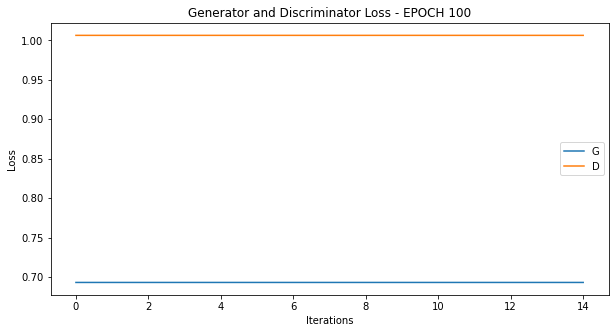

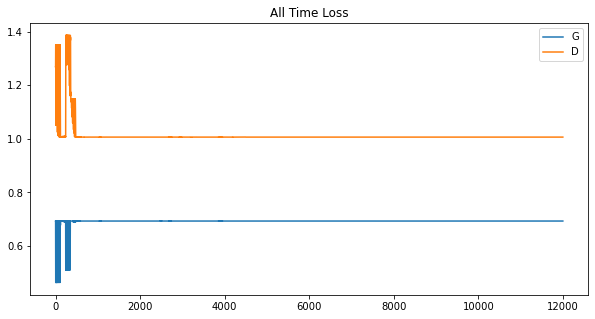

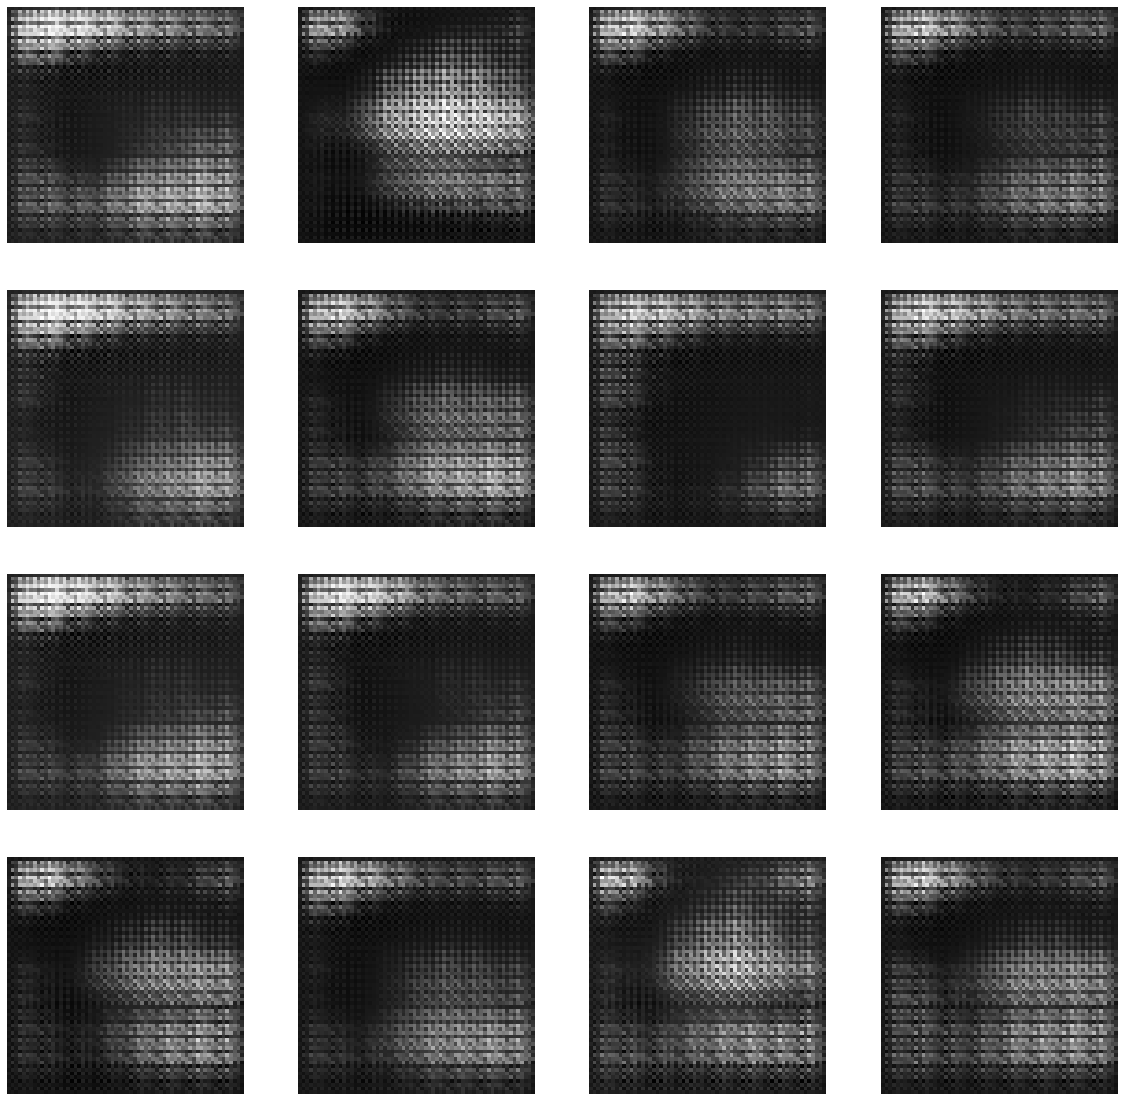

 50%|█████     | 100/200 [07:55<08:31,  5.11s/it]

Epoch: 100 computed for 6.4301371574401855 sec
Gen_loss mean:  0.6931463  std:  1.2778213e-06
Disc_loss mean:  1.00641  std:  1.2129703e-06


 50%|█████     | 101/200 [08:00<08:11,  4.97s/it]

Epoch: 101 computed for 4.626177549362183 sec
Gen_loss mean:  0.6931469  std:  2.9118968e-07
Disc_loss mean:  1.0064094  std:  4.4284286e-07


 51%|█████     | 102/200 [08:04<07:53,  4.84s/it]

Epoch: 102 computed for 4.524457931518555 sec
Gen_loss mean:  0.6931465  std:  1.1146759e-06
Disc_loss mean:  1.0064095  std:  1.1940781e-06


 52%|█████▏    | 103/200 [08:09<07:41,  4.75s/it]

Epoch: 103 computed for 4.561494827270508 sec
Gen_loss mean:  0.69314617  std:  1.5999527e-06
Disc_loss mean:  1.0064101  std:  1.5371375e-06


 52%|█████▏    | 104/200 [08:13<07:30,  4.69s/it]

Epoch: 104 computed for 4.532587766647339 sec
Gen_loss mean:  0.69314694  std:  2.0065913e-07
Disc_loss mean:  1.0064093  std:  6.194296e-07


 52%|█████▎    | 105/200 [08:18<07:20,  4.64s/it]

Epoch: 105 computed for 4.521241903305054 sec
Gen_loss mean:  0.6931468  std:  2.4719765e-07
Disc_loss mean:  1.0064093  std:  3.7318412e-07


 53%|█████▎    | 106/200 [08:22<07:12,  4.61s/it]

Epoch: 106 computed for 4.5253496170043945 sec
Gen_loss mean:  0.6931469  std:  3.744513e-07
Disc_loss mean:  1.0064093  std:  3.5228985e-07


 54%|█████▎    | 107/200 [08:27<07:06,  4.58s/it]

Epoch: 107 computed for 4.519687175750732 sec
Gen_loss mean:  0.6931458  std:  2.8910404e-06
Disc_loss mean:  1.0064104  std:  2.891327e-06


 54%|█████▍    | 108/200 [08:31<06:59,  4.56s/it]

Epoch: 108 computed for 4.510370492935181 sec
Gen_loss mean:  0.6931445  std:  8.295373e-06
Disc_loss mean:  1.0064118  std:  8.43903e-06


 55%|█████▍    | 109/200 [08:36<06:54,  4.55s/it]

Epoch: 109 computed for 4.520905256271362 sec
Gen_loss mean:  0.693145  std:  6.3013135e-06
Disc_loss mean:  1.0064113  std:  6.5445793e-06


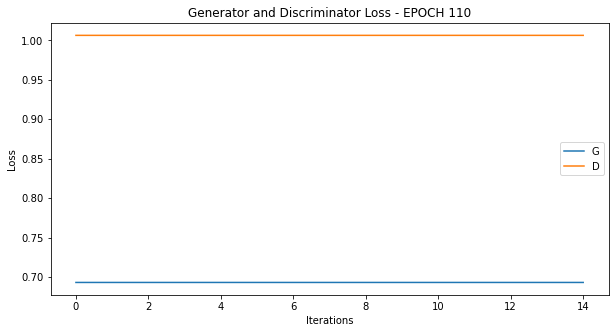

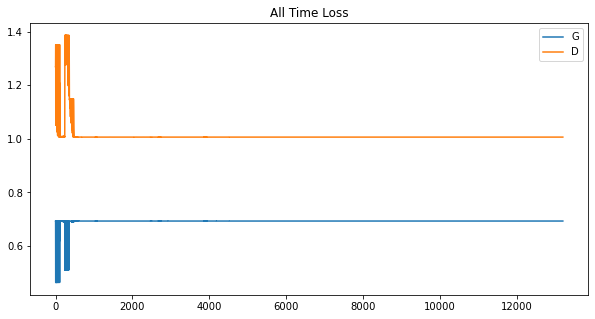

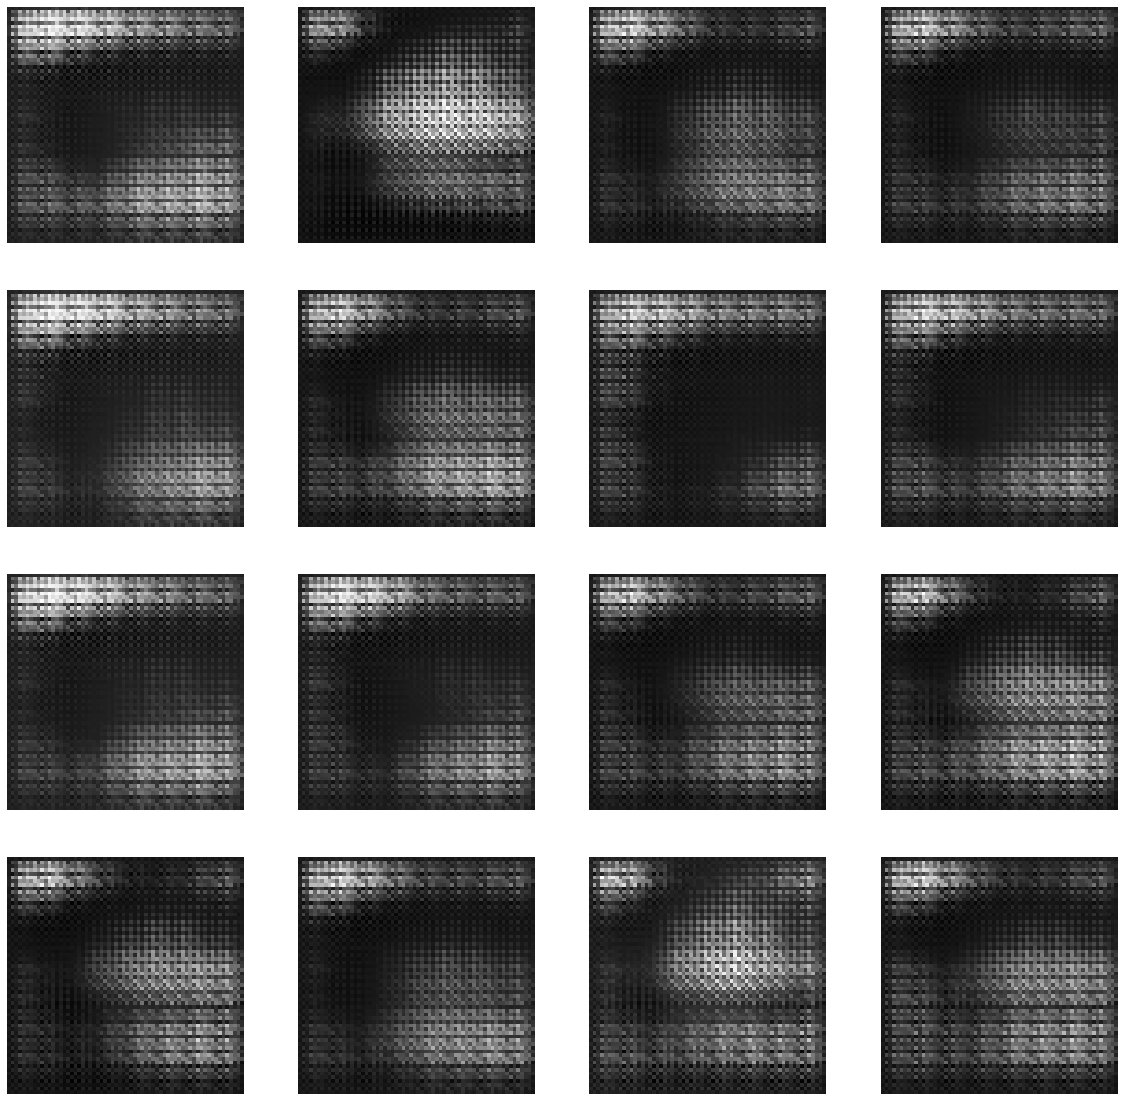

 55%|█████▌    | 110/200 [08:42<07:39,  5.11s/it]

Epoch: 110 computed for 6.406268119812012 sec
Gen_loss mean:  0.6931468  std:  3.0000348e-07
Disc_loss mean:  1.0064093  std:  3.8072395e-07


 56%|█████▌    | 111/200 [08:47<07:22,  4.97s/it]

Epoch: 111 computed for 4.658429861068726 sec
Gen_loss mean:  0.6931246  std:  8.354207e-05
Disc_loss mean:  1.0064318  std:  8.3947845e-05


 56%|█████▌    | 112/200 [08:51<07:06,  4.85s/it]

Epoch: 112 computed for 4.5578742027282715 sec
Gen_loss mean:  0.6931422  std:  1.21164385e-05
Disc_loss mean:  1.0064148  std:  1.2267248e-05


 56%|█████▋    | 113/200 [08:56<06:53,  4.76s/it]

Epoch: 113 computed for 4.538061857223511 sec
Gen_loss mean:  0.6931465  std:  9.887906e-07
Disc_loss mean:  1.0064121  std:  5.7307316e-06


 57%|█████▋    | 114/200 [09:01<06:43,  4.69s/it]

Epoch: 114 computed for 4.5215394496917725 sec
Gen_loss mean:  0.69314635  std:  1.4178725e-06
Disc_loss mean:  1.0064101  std:  1.7275067e-06


 57%|█████▊    | 115/200 [09:05<06:34,  4.64s/it]

Epoch: 115 computed for 4.5162951946258545 sec
Gen_loss mean:  0.6931464  std:  6.3154675e-07
Disc_loss mean:  1.0064099  std:  8.073441e-07


 58%|█████▊    | 116/200 [09:10<06:26,  4.60s/it]

Epoch: 116 computed for 4.525856256484985 sec
Gen_loss mean:  0.6931455  std:  1.9495974e-06
Disc_loss mean:  1.0064111  std:  1.9330048e-06


 58%|█████▊    | 117/200 [09:14<06:19,  4.58s/it]

Epoch: 117 computed for 4.512140512466431 sec
Gen_loss mean:  0.6931464  std:  8.456021e-07
Disc_loss mean:  1.00641  std:  1.2000139e-06


 59%|█████▉    | 118/200 [09:19<06:14,  4.56s/it]

Epoch: 118 computed for 4.520239591598511 sec
Gen_loss mean:  0.6931469  std:  1.5919387e-07
Disc_loss mean:  1.0064094  std:  5.5829327e-07


 60%|█████▉    | 119/200 [09:23<06:08,  4.55s/it]

Epoch: 119 computed for 4.509288787841797 sec
Gen_loss mean:  0.69314665  std:  7.1326616e-07
Disc_loss mean:  1.0064098  std:  1.0759697e-06


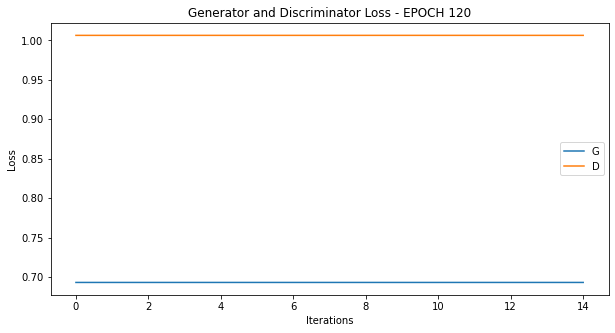

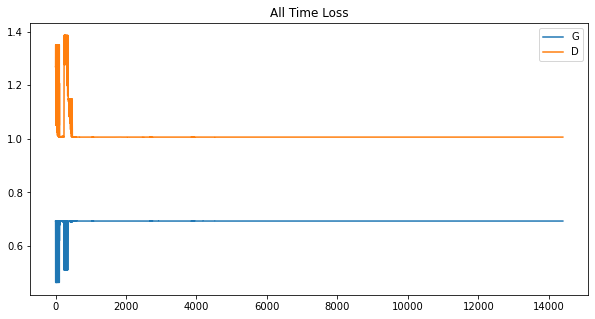

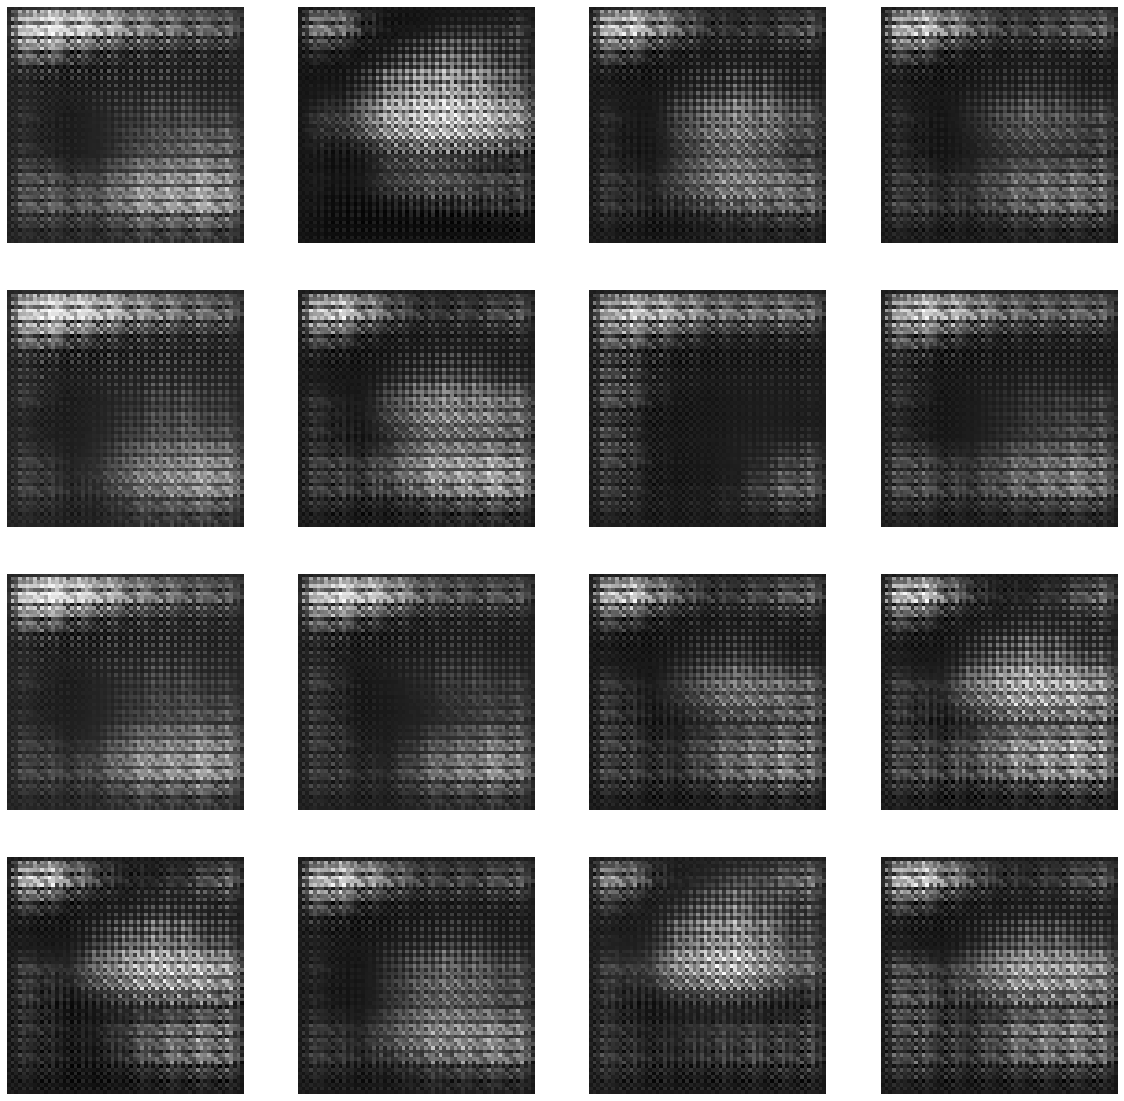

 60%|██████    | 120/200 [09:30<06:49,  5.12s/it]

Epoch: 120 computed for 6.448811054229736 sec
Gen_loss mean:  0.69314533  std:  2.5950962e-06
Disc_loss mean:  1.006411  std:  2.61247e-06


 60%|██████    | 121/200 [09:34<06:33,  4.98s/it]

Epoch: 121 computed for 4.670889139175415 sec
Gen_loss mean:  0.6931463  std:  9.1708546e-07
Disc_loss mean:  1.0064117  std:  5.29402e-06


 61%|██████    | 122/200 [09:39<06:18,  4.85s/it]

Epoch: 122 computed for 4.528987169265747 sec
Gen_loss mean:  0.6931433  std:  8.656146e-06
Disc_loss mean:  1.0064129  std:  8.6263935e-06


 62%|██████▏   | 123/200 [09:43<06:05,  4.75s/it]

Epoch: 123 computed for 4.51960301399231 sec
Gen_loss mean:  0.6931427  std:  8.981664e-06
Disc_loss mean:  1.0064138  std:  8.884572e-06


 62%|██████▏   | 124/200 [09:48<05:56,  4.69s/it]

Epoch: 124 computed for 4.535228729248047 sec
Gen_loss mean:  0.6931425  std:  5.79037e-06
Disc_loss mean:  1.0064147  std:  6.1425376e-06


 62%|██████▎   | 125/200 [09:52<05:47,  4.64s/it]

Epoch: 125 computed for 4.512765645980835 sec
Gen_loss mean:  0.69313014  std:  1.8834136e-05
Disc_loss mean:  1.0064307  std:  3.128478e-05


 63%|██████▎   | 126/200 [09:57<05:40,  4.60s/it]

Epoch: 126 computed for 4.508441925048828 sec
Gen_loss mean:  0.6930918  std:  6.505359e-05
Disc_loss mean:  1.0064739  std:  6.749611e-05


 64%|██████▎   | 127/200 [10:01<05:33,  4.57s/it]

Epoch: 127 computed for 4.51683783531189 sec
Gen_loss mean:  0.6931394  std:  1.2808085e-05
Disc_loss mean:  1.0064176  std:  1.3473498e-05


 64%|██████▍   | 128/200 [10:06<05:28,  4.56s/it]

Epoch: 128 computed for 4.513995885848999 sec
Gen_loss mean:  0.6931417  std:  1.3629781e-05
Disc_loss mean:  1.0064157  std:  1.3720259e-05


 64%|██████▍   | 129/200 [10:11<05:34,  4.71s/it]

Epoch: 129 computed for 5.053037881851196 sec
Gen_loss mean:  0.6931448  std:  5.559594e-06
Disc_loss mean:  1.0064135  std:  9.507442e-06


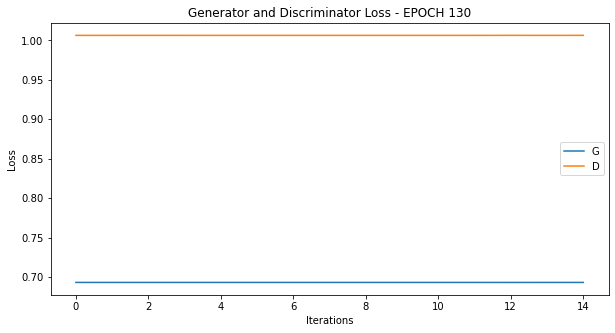

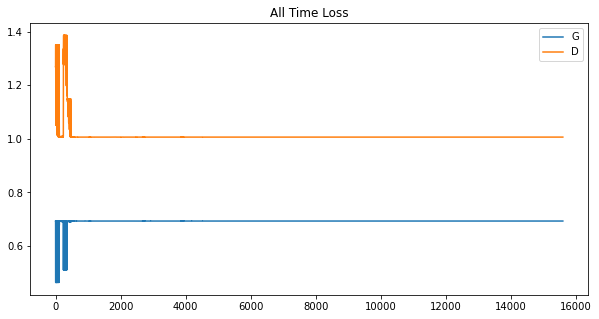

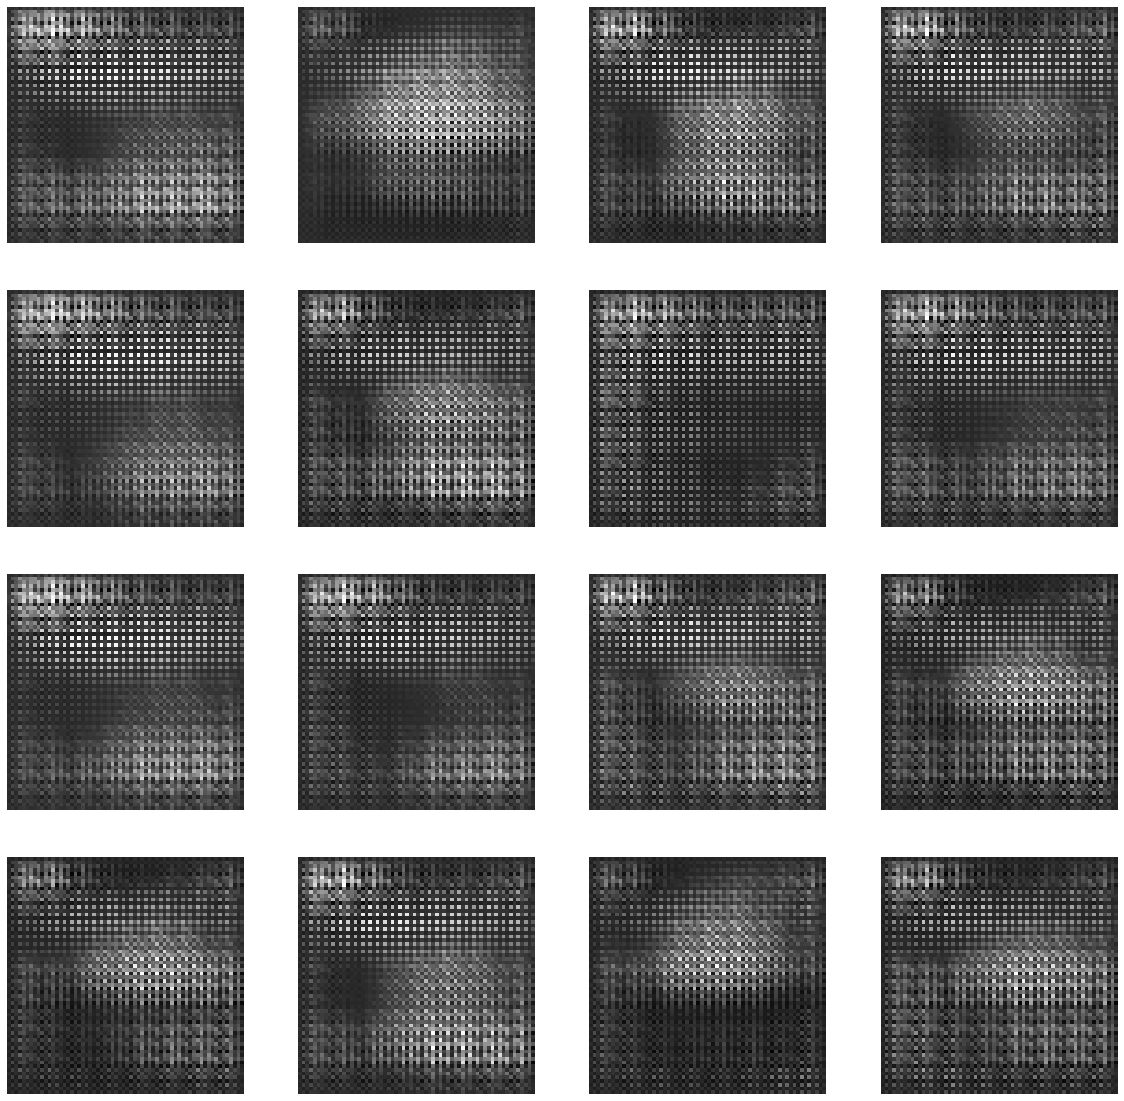

 65%|██████▌   | 130/200 [10:18<06:18,  5.40s/it]

Epoch: 130 computed for 7.0104193687438965 sec
Gen_loss mean:  0.69314384  std:  6.6088983e-06
Disc_loss mean:  1.0064142  std:  8.408158e-06


 66%|██████▌   | 131/200 [10:23<05:56,  5.16s/it]

Epoch: 131 computed for 4.610573768615723 sec
Gen_loss mean:  0.6931451  std:  5.5354503e-06
Disc_loss mean:  1.0064119  std:  5.9479744e-06


 66%|██████▌   | 132/200 [10:27<05:37,  4.97s/it]

Epoch: 132 computed for 4.514153957366943 sec
Gen_loss mean:  0.6931461  std:  7.096041e-07
Disc_loss mean:  1.0064101  std:  7.3742933e-07


 66%|██████▋   | 133/200 [10:32<05:23,  4.83s/it]

Epoch: 133 computed for 4.501683235168457 sec
Gen_loss mean:  0.6931455  std:  2.2306263e-06
Disc_loss mean:  1.006411  std:  2.3060143e-06


 67%|██████▋   | 134/200 [10:36<05:12,  4.74s/it]

Epoch: 134 computed for 4.5165112018585205 sec
Gen_loss mean:  0.6931465  std:  4.7658875e-07
Disc_loss mean:  1.0064099  std:  7.0121007e-07


 68%|██████▊   | 135/200 [10:41<05:03,  4.67s/it]

Epoch: 135 computed for 4.515207529067993 sec
Gen_loss mean:  0.6931465  std:  4.93916e-07
Disc_loss mean:  1.0064099  std:  7.7562413e-07


 68%|██████▊   | 136/200 [10:45<04:56,  4.63s/it]

Epoch: 136 computed for 4.521953344345093 sec
Gen_loss mean:  0.69314563  std:  2.768463e-06
Disc_loss mean:  1.006411  std:  2.7950277e-06


 68%|██████▊   | 137/200 [10:50<04:49,  4.59s/it]

Epoch: 137 computed for 4.5158531665802 sec
Gen_loss mean:  0.69314647  std:  8.137726e-07
Disc_loss mean:  1.0064098  std:  7.925401e-07


 69%|██████▉   | 138/200 [10:54<04:43,  4.57s/it]

Epoch: 138 computed for 4.5195722579956055 sec
Gen_loss mean:  0.69314575  std:  2.1591366e-06
Disc_loss mean:  1.0064107  std:  2.6253122e-06


 70%|██████▉   | 139/200 [11:00<04:54,  4.83s/it]

Epoch: 139 computed for 5.418607711791992 sec
Gen_loss mean:  0.6931468  std:  1.9527535e-07
Disc_loss mean:  1.0064095  std:  7.58331e-07


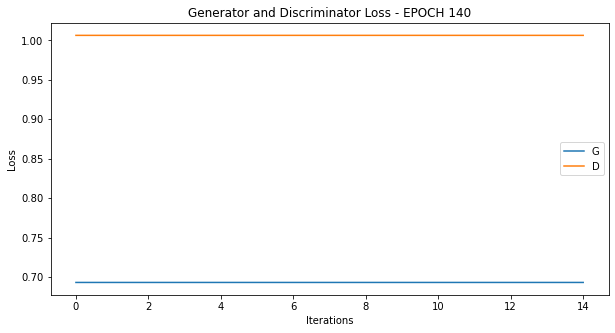

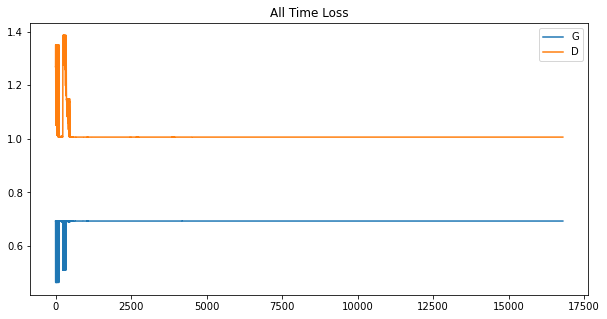

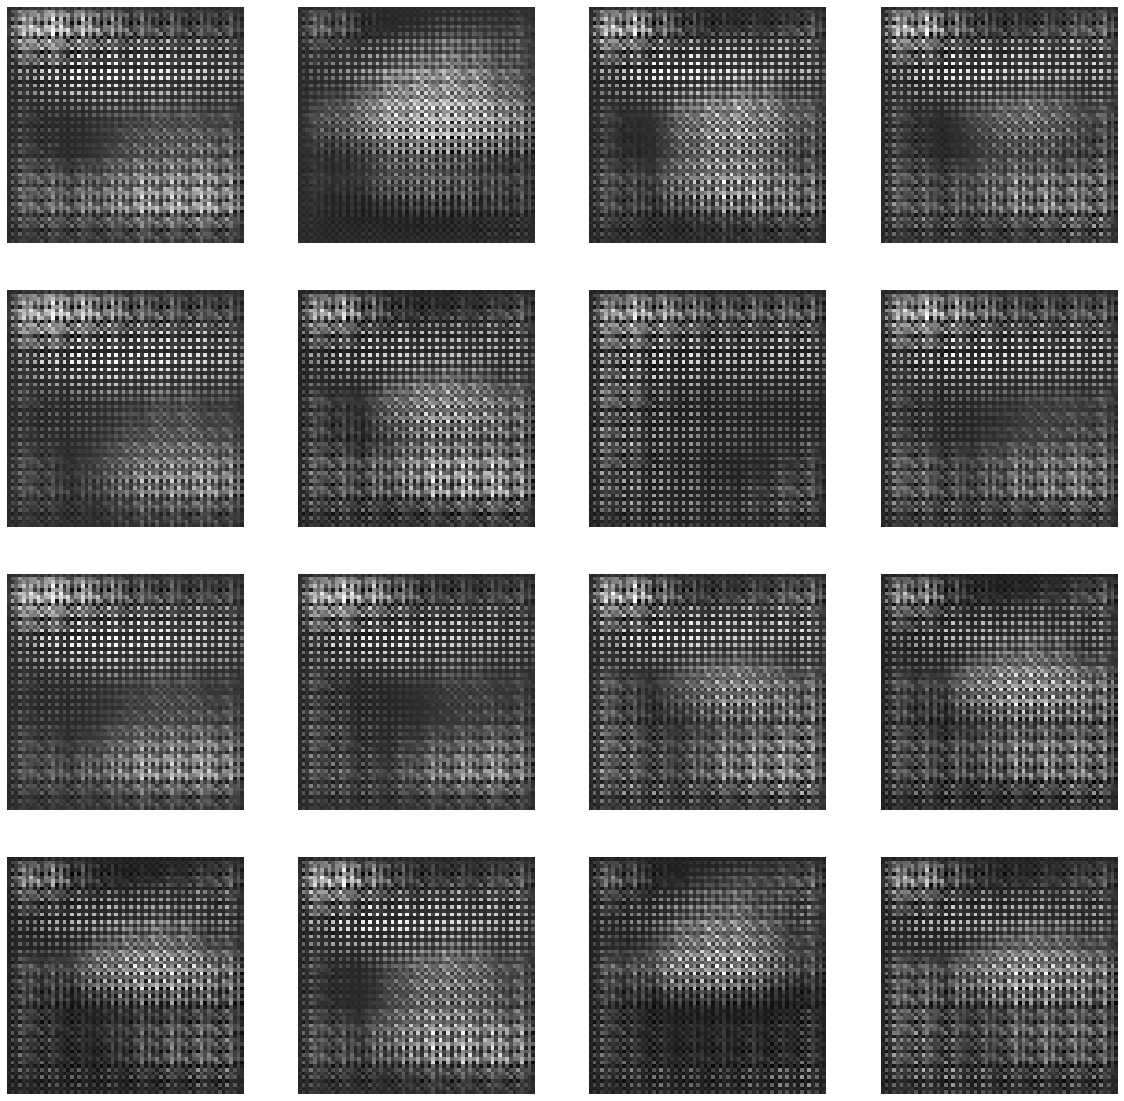

 70%|███████   | 140/200 [11:06<05:18,  5.31s/it]

Epoch: 140 computed for 6.441523790359497 sec
Gen_loss mean:  0.69314647  std:  1.0623459e-06
Disc_loss mean:  1.0064099  std:  1.1110578e-06


 70%|███████   | 141/200 [11:11<05:01,  5.10s/it]

Epoch: 141 computed for 4.613418817520142 sec
Gen_loss mean:  0.6931464  std:  5.8804545e-07
Disc_loss mean:  1.0064099  std:  5.667145e-07


 71%|███████   | 142/200 [11:15<04:45,  4.93s/it]

Epoch: 142 computed for 4.504298686981201 sec
Gen_loss mean:  0.693146  std:  2.8926374e-06
Disc_loss mean:  1.0064104  std:  3.3770823e-06


 72%|███████▏  | 143/200 [11:20<04:33,  4.80s/it]

Epoch: 143 computed for 4.517655611038208 sec
Gen_loss mean:  0.6931467  std:  2.7096632e-07
Disc_loss mean:  1.0064094  std:  3.1838775e-07


 72%|███████▏  | 144/200 [11:24<04:24,  4.72s/it]

Epoch: 144 computed for 4.511080741882324 sec
Gen_loss mean:  0.69314677  std:  2.1710059e-07
Disc_loss mean:  1.0064094  std:  4.5757324e-07


 72%|███████▎  | 145/200 [11:29<04:16,  4.66s/it]

Epoch: 145 computed for 4.525034189224243 sec
Gen_loss mean:  0.6931469  std:  2.1045307e-07
Disc_loss mean:  1.0064093  std:  3.6935648e-07


 73%|███████▎  | 146/200 [11:33<04:09,  4.62s/it]

Epoch: 146 computed for 4.514528512954712 sec
Gen_loss mean:  0.6931468  std:  2.9118968e-07
Disc_loss mean:  1.0064094  std:  6.062899e-07


 74%|███████▎  | 147/200 [11:38<04:03,  4.59s/it]

Epoch: 147 computed for 4.51305627822876 sec
Gen_loss mean:  0.6931467  std:  3.4550135e-07
Disc_loss mean:  1.0064095  std:  6.4783785e-07


 74%|███████▍  | 148/200 [11:42<03:57,  4.56s/it]

Epoch: 148 computed for 4.508361577987671 sec
Gen_loss mean:  0.6931465  std:  9.678492e-07
Disc_loss mean:  1.0064099  std:  1.0622343e-06


 74%|███████▍  | 149/200 [11:47<03:53,  4.58s/it]

Epoch: 149 computed for 4.602253437042236 sec
Gen_loss mean:  0.69314694  std:  1.3850868e-07
Disc_loss mean:  1.0064092  std:  2.2195562e-07


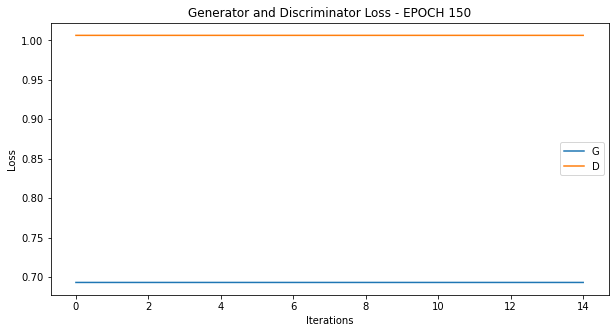

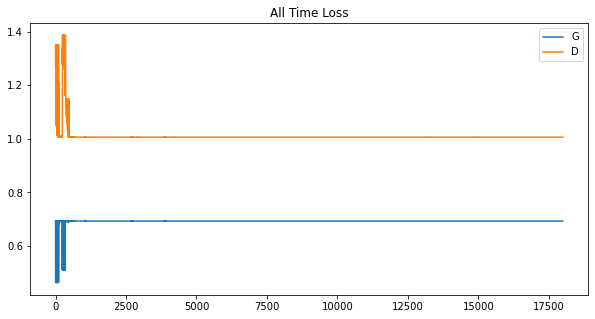

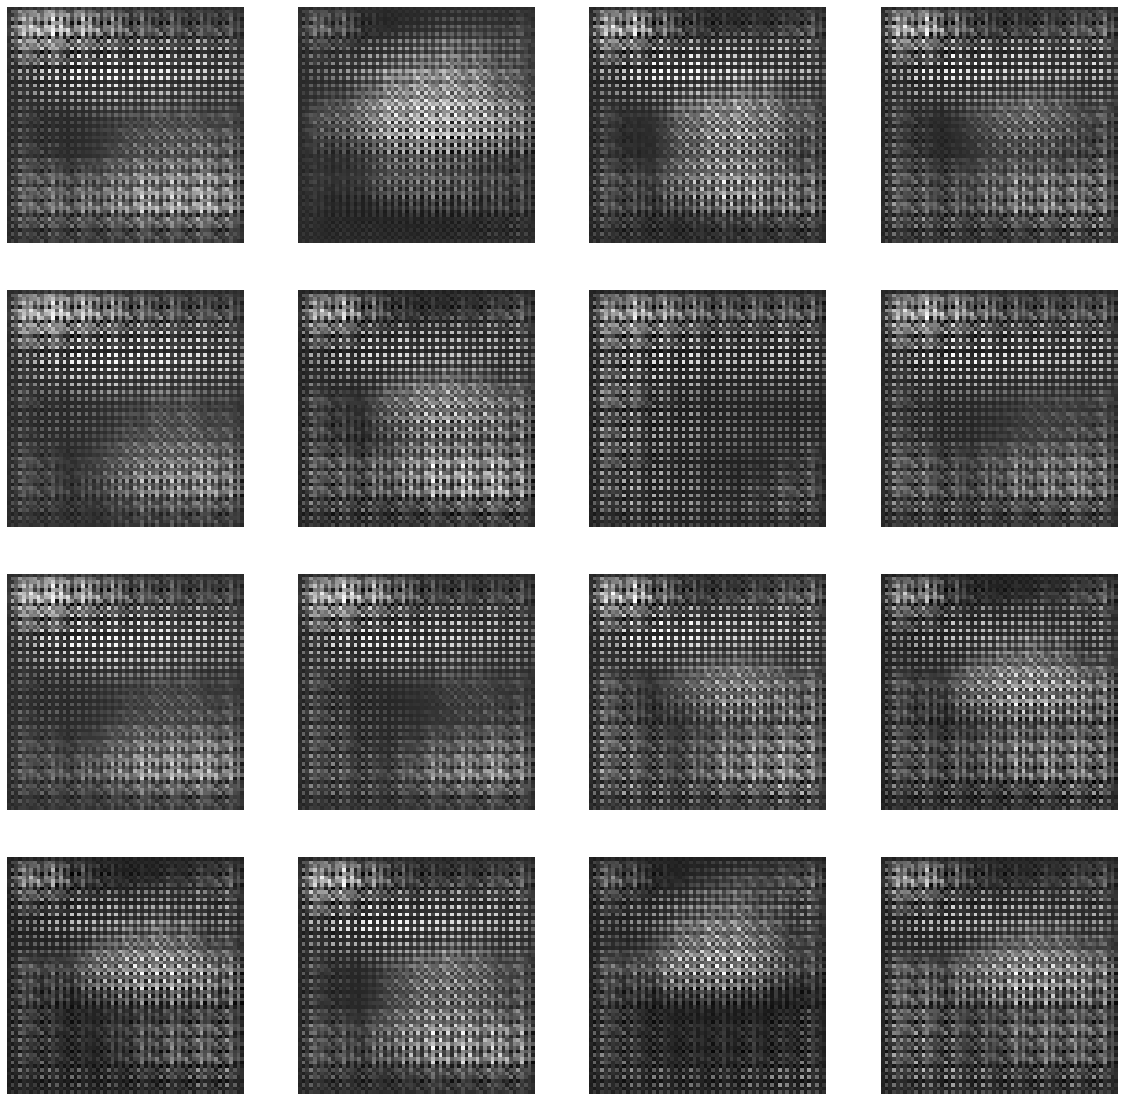

 75%|███████▌  | 150/200 [11:53<04:17,  5.14s/it]

Epoch: 150 computed for 6.453997373580933 sec
Gen_loss mean:  0.6931467  std:  3.8413023e-07
Disc_loss mean:  1.0064094  std:  5.5146376e-07


 76%|███████▌  | 151/200 [11:58<04:04,  4.99s/it]

Epoch: 151 computed for 4.61803674697876 sec
Gen_loss mean:  0.69314575  std:  3.6010283e-06
Disc_loss mean:  1.0064102  std:  3.6585147e-06


 76%|███████▌  | 152/200 [12:03<03:52,  4.84s/it]

Epoch: 152 computed for 4.509260177612305 sec
Gen_loss mean:  0.6931468  std:  2.7487155e-07
Disc_loss mean:  1.0064094  std:  4.385433e-07


 76%|███████▋  | 153/200 [12:07<03:43,  4.75s/it]

Epoch: 153 computed for 4.516138315200806 sec
Gen_loss mean:  0.6931468  std:  2.8460826e-07
Disc_loss mean:  1.0064092  std:  3.2134957e-07


 77%|███████▋  | 154/200 [12:12<03:35,  4.68s/it]

Epoch: 154 computed for 4.518841743469238 sec
Gen_loss mean:  0.6931465  std:  1.029396e-06
Disc_loss mean:  1.0064095  std:  1.0428826e-06


 78%|███████▊  | 155/200 [12:16<03:28,  4.63s/it]

Epoch: 155 computed for 4.511660575866699 sec
Gen_loss mean:  0.69314677  std:  4.7708545e-07
Disc_loss mean:  1.0064093  std:  6.209572e-07


 78%|███████▊  | 156/200 [12:21<03:22,  4.60s/it]

Epoch: 156 computed for 4.516383409500122 sec
Gen_loss mean:  0.69314665  std:  1.0889884e-06
Disc_loss mean:  1.0064094  std:  1.093438e-06


 78%|███████▊  | 157/200 [12:25<03:16,  4.57s/it]

Epoch: 157 computed for 4.515492677688599 sec
Gen_loss mean:  0.6931468  std:  4.4337736e-07
Disc_loss mean:  1.006409  std:  5.54889e-07


 79%|███████▉  | 158/200 [12:30<03:11,  4.56s/it]

Epoch: 158 computed for 4.526728630065918 sec
Gen_loss mean:  0.6931468  std:  1.8339126e-07
Disc_loss mean:  1.0064092  std:  3.5630086e-07


 80%|███████▉  | 159/200 [12:34<03:06,  4.56s/it]

Epoch: 159 computed for 4.548087120056152 sec
Gen_loss mean:  0.69314694  std:  1.4271963e-07
Disc_loss mean:  1.0064092  std:  3.9656877e-07


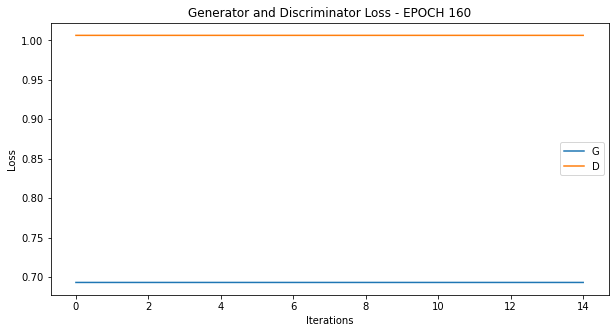

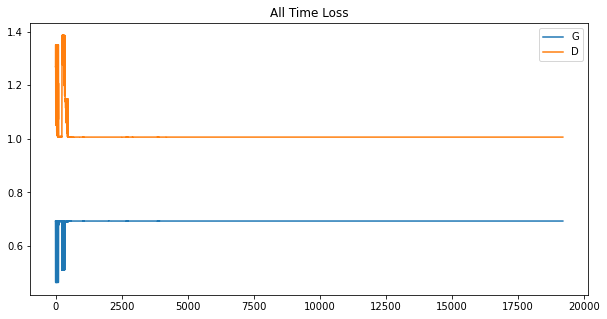

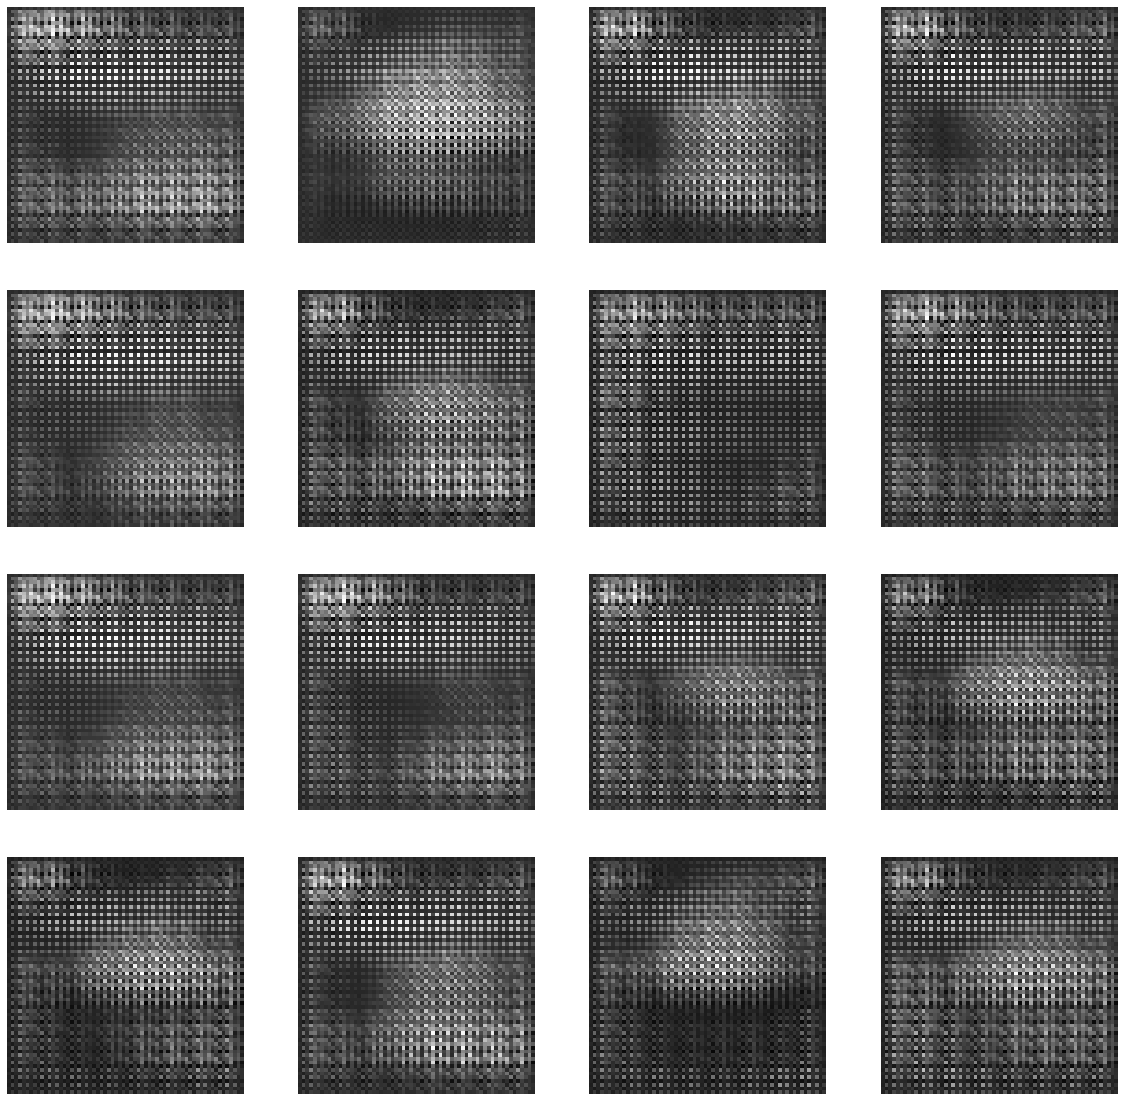

 80%|████████  | 160/200 [12:41<03:25,  5.14s/it]

Epoch: 160 computed for 6.496433258056641 sec
Gen_loss mean:  0.69314694  std:  3.9176172e-07
Disc_loss mean:  1.0064092  std:  4.4391123e-07


 80%|████████  | 161/200 [12:45<03:14,  4.98s/it]

Epoch: 161 computed for 4.617786884307861 sec
Gen_loss mean:  0.6931468  std:  2.6656008e-07
Disc_loss mean:  1.0064092  std:  3.5363192e-07


 81%|████████  | 162/200 [12:50<03:04,  4.84s/it]

Epoch: 162 computed for 4.507499933242798 sec
Gen_loss mean:  0.693147  std:  1.3504541e-07
Disc_loss mean:  1.006409  std:  1.922192e-07


 82%|████████▏ | 163/200 [12:54<02:55,  4.75s/it]

Epoch: 163 computed for 4.51816201210022 sec
Gen_loss mean:  0.6931468  std:  5.940563e-07
Disc_loss mean:  1.0064092  std:  5.758356e-07


 82%|████████▏ | 164/200 [12:59<02:48,  4.68s/it]

Epoch: 164 computed for 4.515099763870239 sec
Gen_loss mean:  0.6931469  std:  2.3289074e-07
Disc_loss mean:  1.0064093  std:  2.4623765e-07


 82%|████████▎ | 165/200 [13:03<02:42,  4.63s/it]

Epoch: 165 computed for 4.5155394077301025 sec
Gen_loss mean:  0.69314694  std:  1.4020823e-07
Disc_loss mean:  1.006409  std:  2.1545794e-07


 83%|████████▎ | 166/200 [13:08<02:36,  4.60s/it]

Epoch: 166 computed for 4.5176756381988525 sec
Gen_loss mean:  0.69314694  std:  1.8013361e-07
Disc_loss mean:  1.006409  std:  2.3238168e-07


 84%|████████▎ | 167/200 [13:12<02:30,  4.57s/it]

Epoch: 167 computed for 4.51593279838562 sec
Gen_loss mean:  0.6931468  std:  4.256623e-07
Disc_loss mean:  1.0064092  std:  4.4497705e-07


 84%|████████▍ | 168/200 [13:17<02:25,  4.56s/it]

Epoch: 168 computed for 4.5125041007995605 sec
Gen_loss mean:  0.69314694  std:  1.7614492e-07
Disc_loss mean:  1.0064092  std:  4.5549805e-07


 84%|████████▍ | 169/200 [13:21<02:20,  4.55s/it]

Epoch: 169 computed for 4.5218048095703125 sec
Gen_loss mean:  0.6931468  std:  8.45462e-07
Disc_loss mean:  1.0064094  std:  9.233912e-07


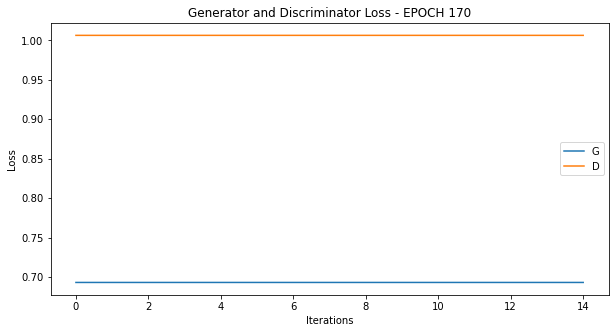

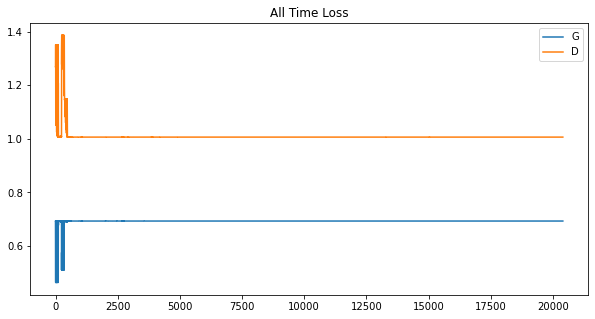

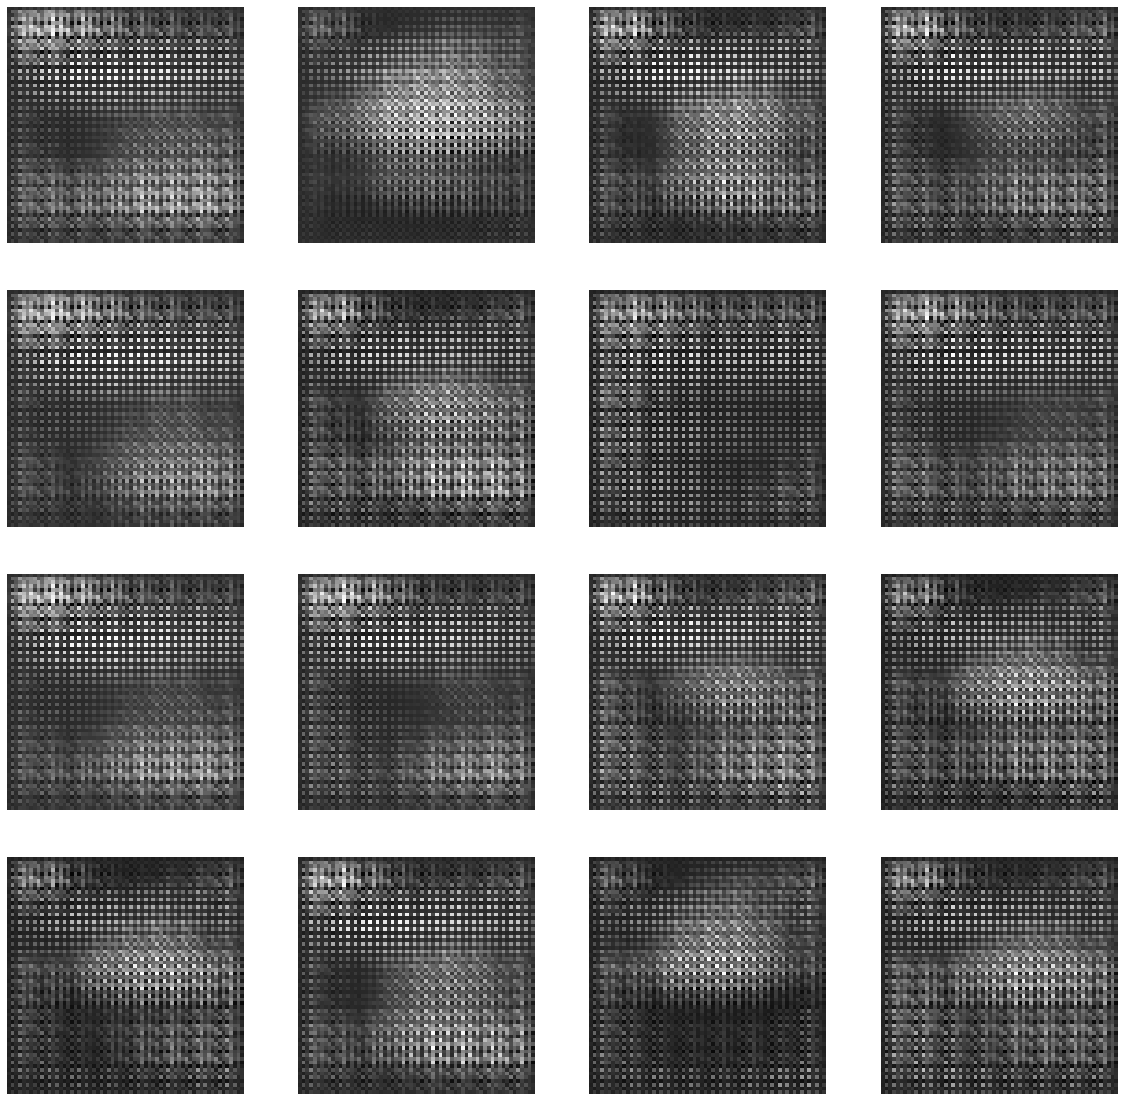

 85%|████████▌ | 170/200 [13:28<02:33,  5.12s/it]

Epoch: 170 computed for 6.463797569274902 sec
Gen_loss mean:  0.693147  std:  1.3149096e-07
Disc_loss mean:  1.0064089  std:  2.6656008e-07


 86%|████████▌ | 171/200 [13:33<02:24,  4.99s/it]

Epoch: 171 computed for 4.687742233276367 sec
Gen_loss mean:  0.69314593  std:  3.6652737e-06
Disc_loss mean:  1.00641  std:  3.7064951e-06


 86%|████████▌ | 172/200 [13:37<02:15,  4.86s/it]

Epoch: 172 computed for 4.533423185348511 sec
Gen_loss mean:  0.6931455  std:  4.9492196e-06
Disc_loss mean:  1.0064107  std:  4.9540986e-06


 86%|████████▋ | 173/200 [13:42<02:08,  4.77s/it]

Epoch: 173 computed for 4.570984363555908 sec
Gen_loss mean:  0.6931469  std:  2.447906e-07
Disc_loss mean:  1.0064092  std:  3.8196612e-07


 87%|████████▋ | 174/200 [13:46<02:02,  4.70s/it]

Epoch: 174 computed for 4.5201256275177 sec
Gen_loss mean:  0.6931469  std:  1.8403588e-07
Disc_loss mean:  1.006409  std:  2.9522857e-07


 88%|████████▊ | 175/200 [13:51<01:56,  4.64s/it]

Epoch: 175 computed for 4.513048887252808 sec
Gen_loss mean:  0.69314677  std:  4.6679736e-07
Disc_loss mean:  1.0064093  std:  5.295541e-07


 88%|████████▊ | 176/200 [13:55<01:50,  4.61s/it]

Epoch: 176 computed for 4.533452272415161 sec
Gen_loss mean:  0.69314677  std:  3.3787651e-07
Disc_loss mean:  1.0064092  std:  3.844384e-07


 88%|████████▊ | 177/200 [14:00<01:45,  4.58s/it]

Epoch: 177 computed for 4.515177965164185 sec
Gen_loss mean:  0.6931469  std:  2.374231e-07
Disc_loss mean:  1.0064092  std:  2.8041646e-07


 89%|████████▉ | 178/200 [14:04<01:40,  4.56s/it]

Epoch: 178 computed for 4.506505489349365 sec
Gen_loss mean:  0.6931463  std:  1.8891946e-06
Disc_loss mean:  1.0064098  std:  1.911566e-06


 90%|████████▉ | 179/200 [14:09<01:35,  4.55s/it]

Epoch: 179 computed for 4.51081109046936 sec
Gen_loss mean:  0.6931468  std:  3.2537804e-07
Disc_loss mean:  1.0064092  std:  3.6935648e-07


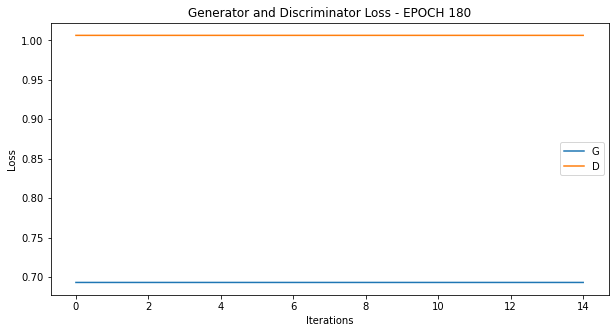

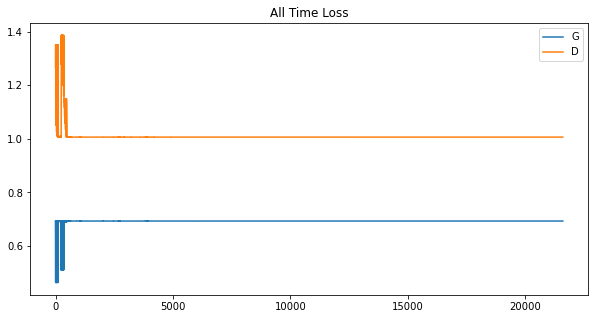

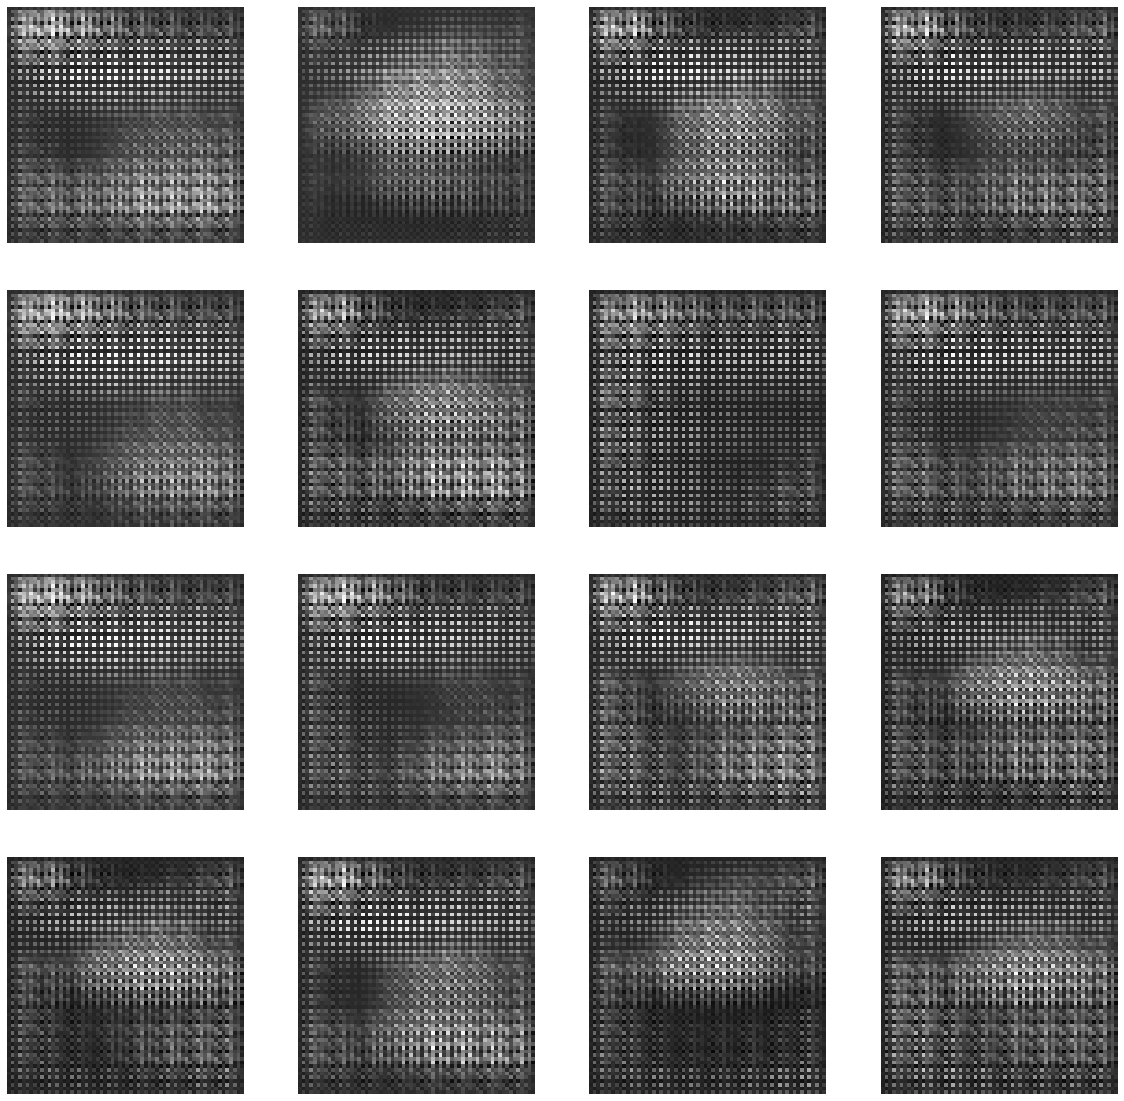

 90%|█████████ | 180/200 [14:15<01:42,  5.11s/it]

Epoch: 180 computed for 6.419917821884155 sec
Gen_loss mean:  0.69314694  std:  2.1380268e-07
Disc_loss mean:  1.0064093  std:  1.4151972e-06


 90%|█████████ | 181/200 [14:20<01:34,  4.96s/it]

Epoch: 181 computed for 4.614218235015869 sec
Gen_loss mean:  0.6931469  std:  3.4789238e-07
Disc_loss mean:  1.0064092  std:  5.7829817e-07


 91%|█████████ | 182/200 [14:24<01:26,  4.83s/it]

Epoch: 182 computed for 4.517162322998047 sec
Gen_loss mean:  0.69314694  std:  1.2311882e-07
Disc_loss mean:  1.006409  std:  1.3416563e-07


 92%|█████████▏| 183/200 [14:29<01:20,  4.74s/it]

Epoch: 183 computed for 4.5234105587005615 sec
Gen_loss mean:  0.6931465  std:  1.655107e-06
Disc_loss mean:  1.0064095  std:  1.6260893e-06


 92%|█████████▏| 184/200 [14:33<01:14,  4.67s/it]

Epoch: 184 computed for 4.519766569137573 sec
Gen_loss mean:  0.693147  std:  2.2826842e-07
Disc_loss mean:  1.006409  std:  3.2863733e-07


 92%|█████████▎| 185/200 [14:38<01:09,  4.63s/it]

Epoch: 185 computed for 4.517726898193359 sec
Gen_loss mean:  0.693147  std:  9.1047596e-08
Disc_loss mean:  1.006409  std:  1.7681596e-07


 93%|█████████▎| 186/200 [14:43<01:04,  4.60s/it]

Epoch: 186 computed for 4.516428232192993 sec
Gen_loss mean:  0.6931468  std:  3.2282028e-07
Disc_loss mean:  1.0064092  std:  2.9522857e-07


 94%|█████████▎| 187/200 [14:47<00:59,  4.58s/it]

Epoch: 187 computed for 4.542997360229492 sec
Gen_loss mean:  0.69314694  std:  1.5694633e-07
Disc_loss mean:  1.0064089  std:  4.4604033e-07


 94%|█████████▍| 188/200 [14:52<00:54,  4.57s/it]

Epoch: 188 computed for 4.553884029388428 sec
Gen_loss mean:  0.6931469  std:  3.6548875e-07
Disc_loss mean:  1.006409  std:  4.915125e-07


 94%|█████████▍| 189/200 [14:56<00:50,  4.56s/it]

Epoch: 189 computed for 4.5366435050964355 sec
Gen_loss mean:  0.693147  std:  9.973765e-08
Disc_loss mean:  1.0064089  std:  1.7681596e-07


In [ ]:
train(X1, 200)